# Overview

Stock market prediction is one of financial analysis's most challenging and exciting tasks. Multiple factors, including market trends, economic conditions, investor sentiment, and company performance influence stock prices. In this notebook, we will analyze the stock market data of four major technology companies:

- Apple Inc. (AAPL)

- Microsoft Corporation (MSFT)

- Amazon.com Inc. (AMZN)

- Tesla Inc. (TSLA)

We will then focus on forecasting Apple's future stock prices using advanced machine-learning techniques. The dataset will be sourced from Yahoo Finance, and the workflow includes exploratory data analysis (EDA), feature extraction, data preprocessing, and model implementation. We will develop Long Short-Term Memory (LSTM), Prophet, ARIMA, XGBOOST  and regression models to predict stock prices effectively.

## Workflow of the Notebook
- Data Collection: We will retrieve historical stock data (Open, High, Low, Close, Adjusted Close, Volume) using the yfinance Python library.

- Exploratory Data Analysis (EDA): We will visualize price trends, and moving averages, and examine correlations.

- Feature Engineering: We will generate technical indicators (e.g., Moving Averages, RSI, MACD) for better insights.

- Preprocessing: We will normalize data, reshape it for LSTM input, and handle missing values.

-  Model Implementation: We will train an LSTM deep learning model, Prophet, ARIMA, XGBOOST and Ridge regression to forecast stock prices.

- Evaluation & Interpretation: We will assess model accuracy using Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and R² scores.

- Results & Conclusion: We will compare predicted vs. actual prices and summarize findings.


# 1. Essential Libraries

This notebook utilizes key libraries for financial data analysis. Below is a brief overview of each library and installation steps for any Python environment.

## 1.1 yfinance

`yfinance` is a popular Python library for accessing financial market data from Yahoo! Finance. It provides a simple API to fetch historical data for stocks, indices, ETFs, crypto, and forex. Additionally, it includes tools for dividend/split adjustments and data visualization, making it a reliable choice for traders and investors.


In [3]:
%%capture
!pip install --upgrade yfinance

## 1.2 Quantstats

`Quantstats` is a Python library for quantitative financial analysis. It offers tools for data retrieval, technical and fundamental analysis, strategy testing, and portfolio visualization, making it essential for finance-focused studies.


In [4]:
%%capture
!pip install -q quantstats

## 1.3 PyPortfolioOpt

`PyPortfolioOpt` is a powerful library for portfolio optimization and asset allocation. It offers tools for building optimized portfolios using models like mean-variance and Black-Litterman, tailored to user constraints and risk preferences. Its flexibility and ease of use make it essential for portfolio construction.


In [5]:
%%capture
!pip install PyPortfolioOpt

## 1.4 TA

The `TA` library is a Python tool for technical analysis, offering indicators like moving averages, Bollinger Bands, MACD, and RSI to assess trends, momentum, and volatility. It’s user-friendly and customizable, making it invaluable for traders and analysts seeking market insights.


In [6]:
%%capture
!pip install ta

## 1.5 PMDARIMA

`PMDARIMA` (AutoRegressive Integrated Moving Average with exogenous variables) is a Python library designed to automate the process of fitting ARIMA models to time series data, making it easier to find the best model parameters for forecasting with minimal manual intervention.

In [7]:
%%capture
!pip install pmdarima

With an overview of the key financial libraries covered, we can now proceed to import the specific libraries required for this notebook.


In [8]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
import numpy as np
from scipy import stats
from pandas_datareader import data as pdr

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Max-min scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

#Machine Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from prophet import Prophet
import statsmodels.api as sm
from pmdarima import auto_arima
import shap
import xgboost as xgb




# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# For time stamps
from datetime import datetime
from datetime import timedelta

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
from datetime import datetime, timedelta
import warnings
import pytz
import os
import optuna
# Other
from tabulate import tabulate

warnings.filterwarnings("ignore")

# 2.  Getting Started

We will use Yahoo Finance to analyze the stock market performance of four major technology companies: Apple (AAPL), Amazon (AMZN), Tesla (TSLA), and Microsoft (MSFT). Our dataset contains daily returns for these companies from January 1, 2020, to January 1, 2025.

In [9]:
df=pd.DataFrame()

In [10]:
# List of tickers
tickers = ['AAPL', 'AMZN', 'TSLA', 'MSFT']

# Get yesterday's date
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

# Download data
df = yf.download(tickers, start="2020-01-01", end=yesterday,group_by=tickers, auto_adjust=False)

# ✅ Reset index to move 'Date' from index to a column
df = df.stack(level=0).reset_index()

# ✅ Rename columns for clarity
df.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Display the cleaned DataFrame
df.tail(10)


[*********************100%***********************]  4 of 4 completed


,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
5930,2025-11-24,MSFT,475.000000,476.899994,468.019989,474.000000,474.000000,34421000
5931,2025-11-24,TSLA,402.170013,421.720001,401.089996,417.779999,417.779999,96806400
5932,2025-11-25,AAPL,275.269989,280.380005,275.250000,276.970001,276.970001,46914200
5933,2025-11-25,AMZN,226.380005,230.520004,223.800003,229.669998,229.669998,39379300
5934,2025-11-25,MSFT,474.070007,479.149994,464.890015,476.989990,476.989990,28019800
5935,2025-11-25,TSLA,414.420013,420.480011,405.950012,419.399994,419.399994,71915600
5936,2025-11-26,AAPL,276.959991,279.529999,276.630005,277.549988,277.549988,33431400
5937,2025-11-26,AMZN,230.740005,231.750000,228.770004,229.160004,229.160004,38497900
5938,2025-11-26,MSFT,486.309998,488.309998,481.200012,485.500000,485.500000,25709100
5939,2025-11-26,TSLA,423.950012,426.940002,416.890015,426.579987,426.579987,63463000


In [11]:
df['target_up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [12]:
df.head(5)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,target_up
0,2020-01-02,AAPL,74.059998,75.150002,73.797501,75.087502,72.468254,135480400,1
1,2020-01-02,AMZN,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,1
2,2020-01-02,MSFT,158.779999,160.729996,158.330002,160.619995,152.505707,22622100,0
3,2020-01-02,TSLA,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,1
4,2020-01-03,AAPL,74.287498,75.144997,74.125000,74.357498,71.763718,146322800,1


Dataset explanation :

**Open**: Price at market opening.

**High**: The highest price during the day.

**Low**: The lowest price during the day.

**Close**: Price at market close.

**Adj Close**: The closing price adjusted for dividends, stock splits, etc., making it useful for analysis over time.

**Volume**: The total number of shares traded during the day.

In [13]:
df=df.set_index('Date')

Examining our dataset, we observe that the data consists of numerical values, with the date serving as the index.

## 2.1 Descriptive Statistics

`.describe()` provides a summary of descriptive statistics for your dataset, including measures of central tendency (mean, median), dispersion (standard deviation, min, max), and distribution (percentiles). It excludes NaN values and works with both numeric and object data types. The output adapts based on the data type of the columns analyzed.

In [14]:
df[df['Ticker']=='AAPL'].describe()

,Open,High,Low,Close,Adj Close,Volume,target_up
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000
mean,165.198896,167.072335,163.494793,165.367953,163.215084,8.521053e+07,0.408754
std,47.347890,47.690103,47.068780,47.405133,48.108274,5.138210e+07,0.491769
min,57.020000,57.125000,53.152500,56.092499,54.264332,2.323470e+07,0.000000
25%,134.300003,135.410004,132.809998,134.179993,131.017715,5.132640e+07,0.000000
50%,165.020004,166.600006,163.820007,165.300003,162.697281,7.079080e+07,0.000000
75%,195.399994,197.080002,193.669998,195.610001,193.607956,1.012562e+08,1.000000
max,276.989990,280.380005,276.630005,277.549988,277.549988,4.265100e+08,1.000000


We have only 1,259 records over the five-year period because the data excludes weekends and public holidays when the stock market is closed.

## 2.2 Information About the Data

The `.info()` method displays details about a DataFrame, such as the index type, column data types, the number of non-null values in each column, and the memory usage.

In [15]:
df[df['Ticker']=='AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1485 entries, 2020-01-02 to 2025-11-26
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     1485 non-null   object 
 1   Open       1485 non-null   float64
 2   High       1485 non-null   float64
 3   Low        1485 non-null   float64
 4   Close      1485 non-null   float64
 5   Adj Close  1485 non-null   float64
 6   Volume     1485 non-null   int64  
 7   target_up  1485 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 104.4+ KB


## 2.3 Unique Values

The `df.nunique()` method shows the number of unique values in each column of the DataFrame:

- **Ticker**: 4 unique tickers (AAPL, AMZN, TSLA, MSFT).  
- **Open, High, Low, Close, Adj Close**: Thousands of unique price values due to daily fluctuations.  
- **Volume**: 5017 unique trading volumes, reflecting the variability in daily stock activity.

In [16]:
df.nunique()

Ticker          4
Open         5479
High         5460
Low          5502
Close        5536
Adj Close    5826
Volume       5913
target_up       2
dtype: int64

# 3. Exploratory Data Analysis (EDA)

## 3.1 Distribution of Open Prices

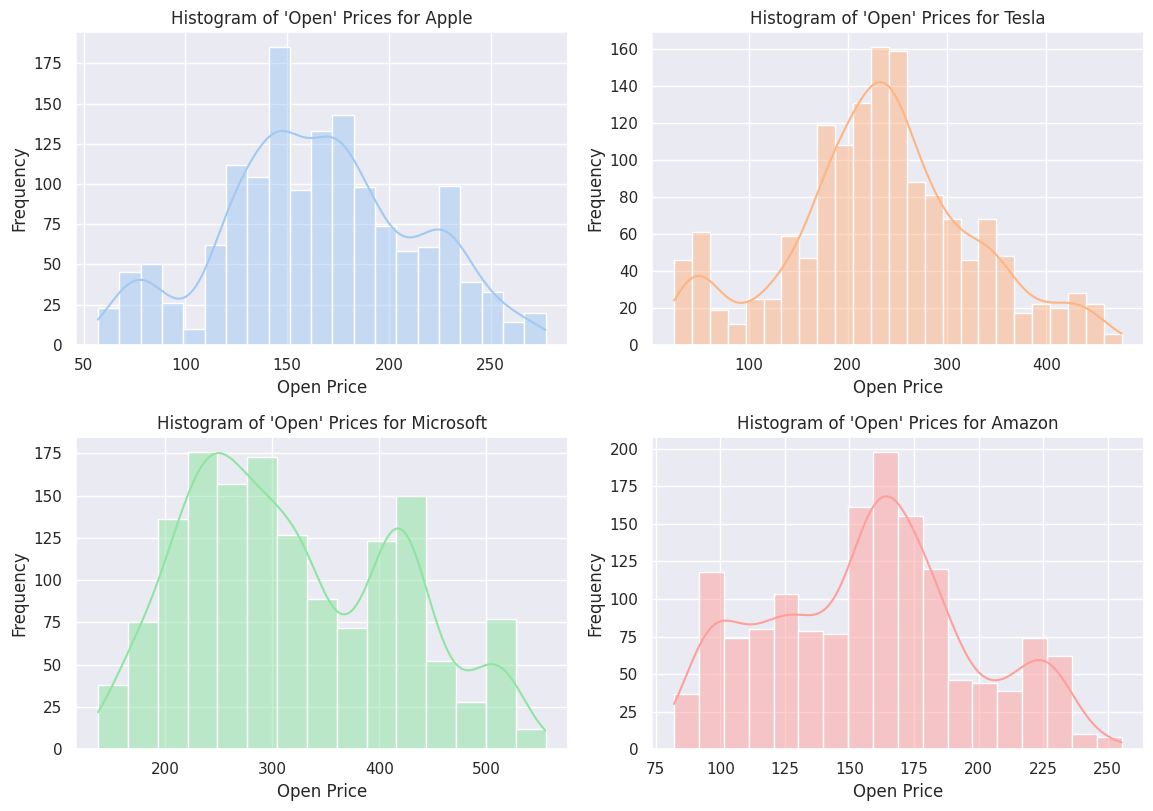

In [17]:
# Set the figure size
sns.set(rc={'figure.figsize':(11.7, 8.27)}, palette="pastel")  # Soft color palette (pastel)

# List of tickers you want to plot
tickers = ['AAPL', 'TSLA', 'MSFT', 'AMZN']
companies=['Apple','Tesla','Microsoft','Amazon']
# Create a 2x2 grid of subplots
plt.figure(figsize=(11.7, 8.27))

# Loop through each ticker and plot the distribution of 'Open' prices
for i, (ticker,company) in enumerate(zip(tickers,companies),1):
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]

    # Create a subplot for each ticker
    plt.subplot(2, 2, i)

    # Plot histogram with KDE
    sns.histplot(data=ticker_data, x='Open', kde=True, color=sns.color_palette()[i-1])

    # Add title and labels
    plt.title(f"Histogram of 'Open' Prices for {company}")
    plt.xlabel("Open Price")
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


This figure aims to show the distribution of the 'open' prices of the stock. By visualizing the distribution, we can see if it is skewed or symmetric and if there are any outliers. This information can help us understand the range of prices and how the prices are distributed.


In [18]:
# Measuring skewness with quantstats
print('Measuring skewness of each company:')
print("Apple's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AAPL']['Open']).round(2))
print("Tesla's skewness: ", qs.stats.skew(df[df['Ticker'] == 'TSLA']['Open']).round(2))
print("Microsoft's skewness: ", qs.stats.skew(df[df['Ticker'] == 'MSFT']['Open']).round(3))
print("Amazon's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AMZN']['Open']).round(3))


Measuring skewness of each company:
Apple's skewness:  0.06
Tesla's skewness:  0.4
Microsoft's skewness:  0.069
Amazon's skewness:  0.142


# Skewness of Each Company's Opening Prices

- **Apple's skewness: -0.12**  
Apple's opening price distribution is slightly negatively skewed, meaning the left tail of the distribution is a bit longer than the right. This indicates that Apple has experienced occasional lower-than-usual opening prices, which pulls the distribution slightly to the left.

- **Tesla's skewness: 0.39**  
Tesla's opening price distribution shows a mild positive skew, meaning the right tail is longer than the left. This suggests that Tesla has had occasional higher-than-usual opening prices, which skews the distribution to the right.

- **Microsoft's skewness: -0.134**  
Microsoft's opening price distribution is slightly negatively skewed. Similar to Apple, this indicates that Microsoft has experienced occasional lower-than-usual opening prices, shifting the distribution slightly to the left.

- **Amazon's skewness: -0.037**  
Amazon's opening price distribution is very close to symmetrical, with a skewness value near zero. This suggests that Amazon’s opening prices are fairly evenly distributed, without significant skew toward higher or lower values.


- Apple, Microsoft, and Amazon all show slight negative skew, indicating occasional lower-than-usual opening prices.
- Tesla has a mild positive skew, suggesting it has experienced occasional higher-than-usual opening prices.
- Overall, the skewness is relatively mild for all companies, with Tesla exhibiting the most notable positive skew, and the others showing mild negative skew.




## 3.2 Distribution of Close Prices

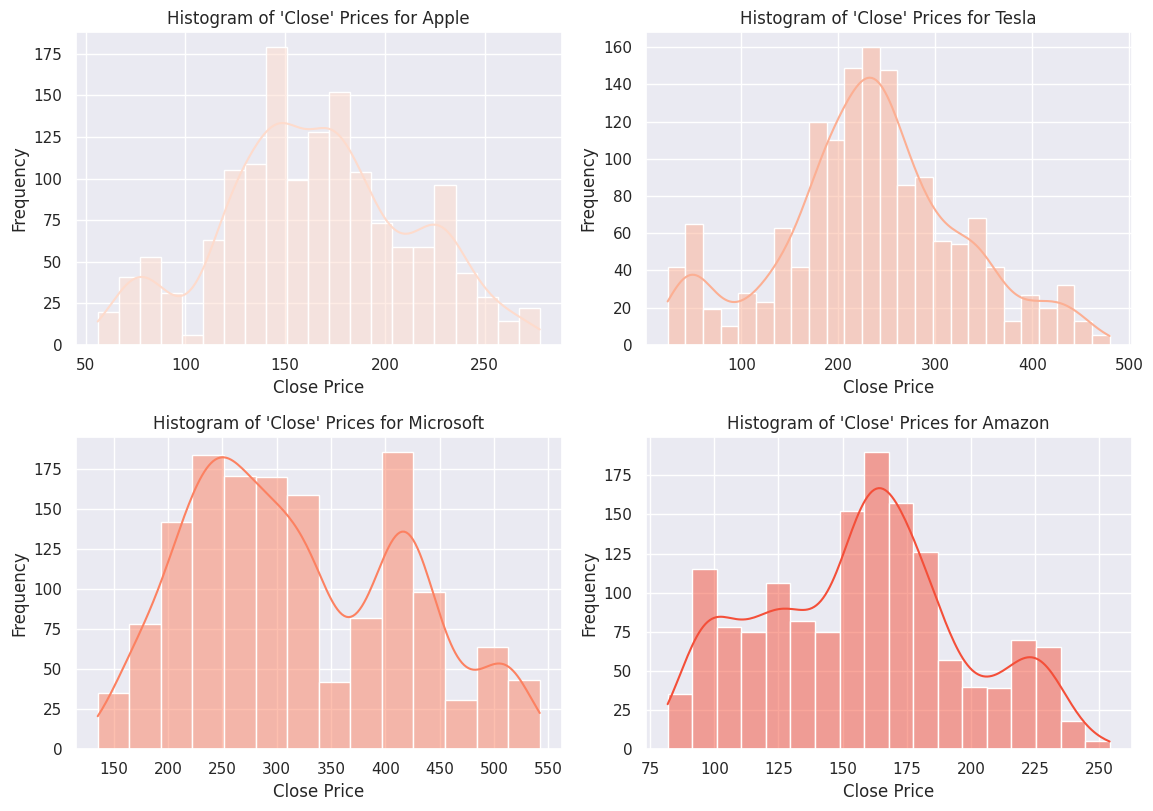

In [19]:
sns.set(rc={'figure.figsize':(11.7, 8.27)}, palette="Reds")
# List of tickers you want to plot
tickers = ['AAPL', 'TSLA', 'MSFT', 'AMZN']
companies=['Apple','Tesla','Microsoft','Amazon']
# Create a 2x2 grid of subplots
plt.figure(figsize=(11.7, 8.27))

# Loop through each ticker and plot the distribution of 'Open' prices
for i, (ticker,company) in enumerate(zip(tickers,companies), 1):
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]

    # Create a subplot for each ticker
    plt.subplot(2, 2, i)

    # Plot histogram with KDE
    sns.histplot(data=ticker_data, x='Close', kde=True, color=sns.color_palette()[i-1])

    # Add title and labels
    plt.title(f"Histogram of 'Close' Prices for {company}")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
# Measuring skewness with quantstats
print('Measuring skewness of each company:')
print("Apple's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AAPL']['Close']).round(2))
print("Tesla's skewness: ", qs.stats.skew(df[df['Ticker'] == 'TSLA']['Close']).round(2))
print("Microsoft's skewness: ", qs.stats.skew(df[df['Ticker'] == 'MSFT']['Close']).round(3))
print("Amazon's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AMZN']['Close']).round(3))


Measuring skewness of each company:
Apple's skewness:  0.28
Tesla's skewness:  0.24
Microsoft's skewness:  0.11
Amazon's skewness:  0.141


### Skewness Interpretation for Each Company's Closing Prices

- **Apple's skewness: 0.11**  
Apple's closing price distribution is slightly positively skewed, meaning the right tail of the distribution is a bit longer than the left. This suggests that there are occasional higher closing prices, pulling the distribution slightly to the right, but the effect is mild.

- **Tesla's skewness: 0.21**  
Tesla's closing price distribution is also mildly positively skewed. The right tail is slightly longer, indicating that there are occasional higher closing prices that are skewing the distribution to the right, though this effect is not very pronounced.

- **Microsoft's skewness: -0.014**  
Microsoft's closing price distribution is very close to being symmetric, with a skewness value near zero. This suggests that the distribution of Microsoft’s closing prices is almost normal, without any significant skew to either the left or right.

- **Amazon's skewness: 0.071**  
Amazon's closing price distribution is slightly positively skewed. Similar to Apple and Tesla, it has a mild tendency for higher closing prices, but the effect is relatively small and does not significantly alter the overall shape of the distribution.

In this case, all four companies show either a mild positive or near-zero skew. Tesla has the most noticeable positive skew, while Microsoft shows almost no skew at all. Apple and Amazon show slight positive skew, with Amazon's being the least pronounced. None of the companies have significant negative skew, meaning there are no notable patterns of unusually low closing prices for any of them.


## 3.3 Open vs Close Price Scatter Plot

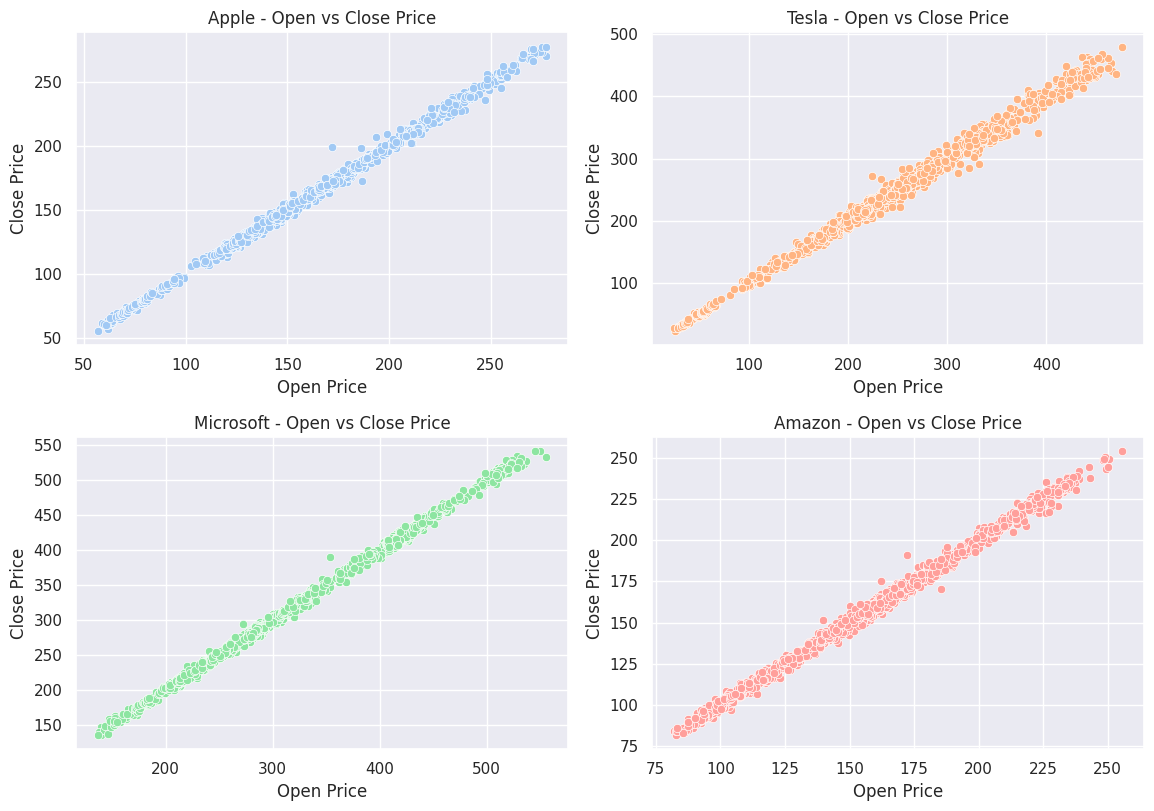

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and use a pastel color palette
sns.set(rc={'figure.figsize':(11.7, 8.27)}, palette="pastel")

# List of tickers and corresponding company names
tickers = ['AAPL', 'TSLA', 'MSFT', 'AMZN']
companies = ['Apple', 'Tesla', 'Microsoft', 'Amazon']

# Create a 2x2 grid of subplots
plt.figure(figsize=(11.7, 8.27))

# Loop through each ticker and corresponding company name
for i, (ticker, company) in enumerate(zip(tickers, companies), 1):
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]

    # Create a subplot for each ticker
    plt.subplot(2, 2, i)

    # Plot scatterplot for Open vs Close prices
    sns.scatterplot(x='Open', y='Close', data=ticker_data, color=sns.color_palette()[i-1])

    # Add title and labels
    plt.title(f"{company} - Open vs Close Price")
    plt.xlabel("Open Price")
    plt.ylabel("Close Price")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


- In this figure, we examine the relationship between the stock's opening and closing prices to understand how closely they align throughout the day. By observing whether the prices are correlated or diverge, we can gain insights into how similar or different the stock's value is at the start and end of the trading session. This information helps in assessing the volatility of the stock.

From the plot, we can see that for each company, the open and close prices are close, indicating that there isn't significant fluctuation between the beginning and end of the trading day. This suggests a level of stability in the stock's daily performance for these companies.


## 3.4 What was the daily return of the stock on average?

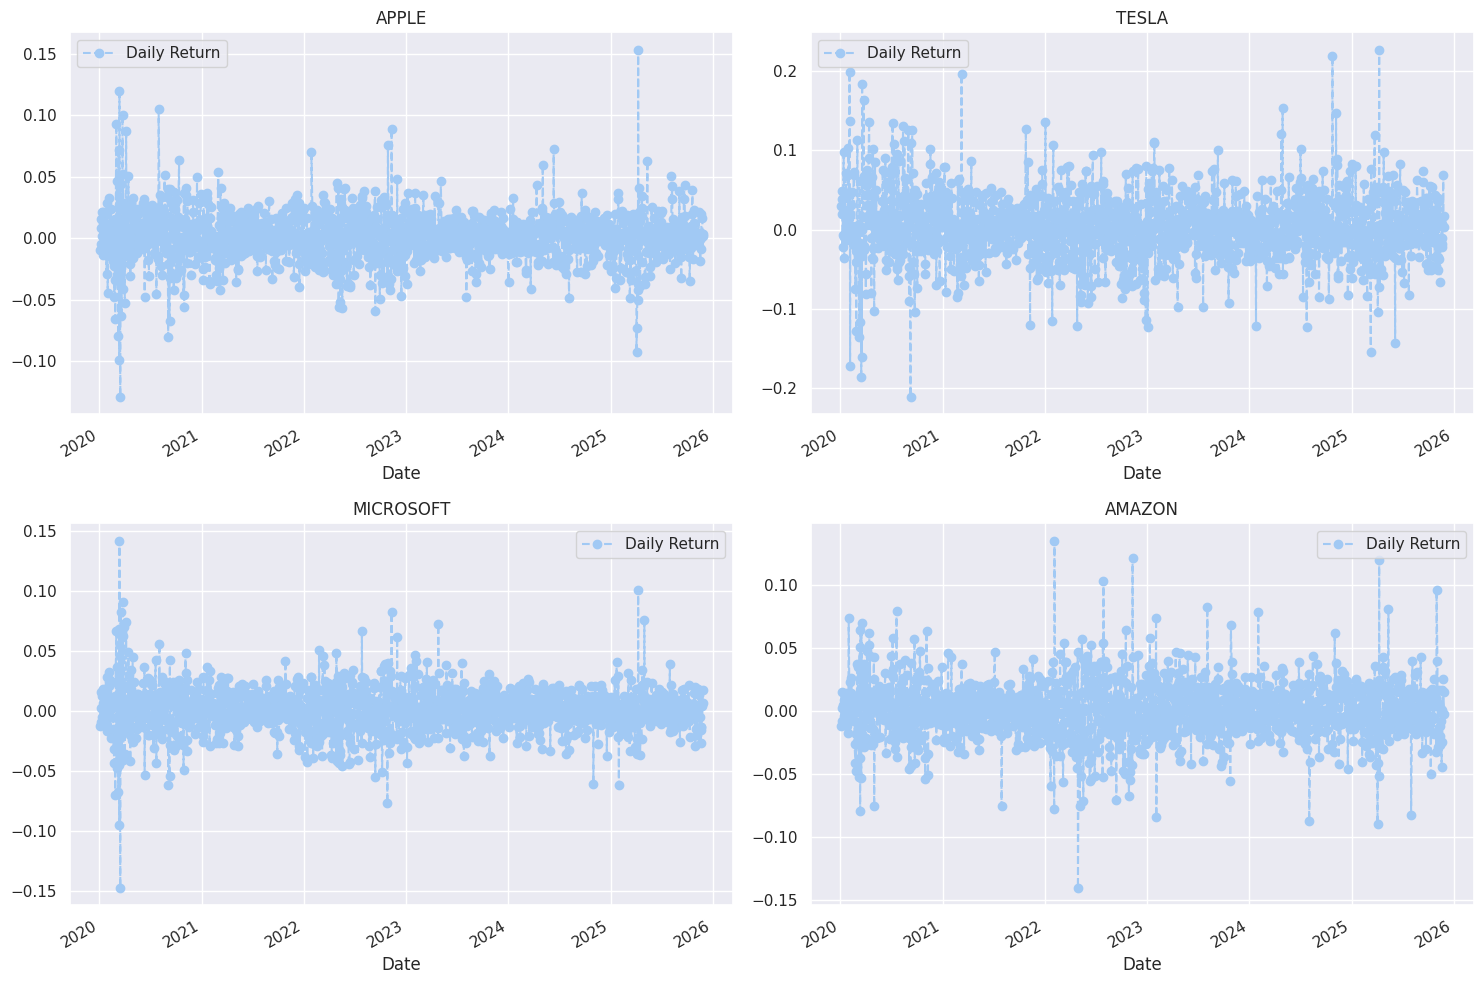

In [22]:
df['Daily Return'] =df.groupby('Ticker')['Adj Close'].pct_change()
# Then we'll plot the daily return percentage


# Filter data for apple, tesla, microsoft and amazon
aapl_returns = df[df['Ticker'] == 'AAPL']['Daily Return'].dropna()
tsla_returns = df[df['Ticker'] == 'TSLA']['Daily Return'].dropna()
msft_returns= df[df['Ticker'] == 'MSFT']['Daily Return'].dropna()
amzn_returns=df[df['Ticker'] == 'AMZN']['Daily Return'].dropna()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
aapl_returns.plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
tsla_returns.plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TESLA')
msft_returns.plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
amzn_returns.plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

### **Interpretation of the Daily Return Plots**  

The four histograms show **daily return plots** for **Apple (AAPL), Tesla (TSLA), Microsoft (MSFT), and Amazon (AMZN)** from 2020 to early 2025. Each plot represents the daily percentage change in adjusted closing prices, showing the **volatility** and **return distribution** over time.  

 **Most returns cluster around zero:**  
   - Across all four stocks, the majority of daily returns remain within a small range (±5%), suggesting **relative stability** most of the time.  
   - However, there are noticeable **outliers** indicating high volatility on certain days.  

 **Tesla (TSLA) shows the highest volatility:**  
   - Tesla’s plot has extreme daily return spikes, sometimes exceeding **+30%** and **-20%**, highlighting **higher price fluctuations**.  
   - This suggests that Tesla is a **high-risk, high-reward** stock, likely driven by market sentiment, earnings reports, or industry trends (e.g., EV sector growth).  

 **Microsoft (MSFT) has a more balanced and stable return distribution:**  
   - Most of its daily returns stay within **±10%**, showing less volatility compared to Tesla.  
   - This aligns with Microsoft’s position as a **stable, blue-chip tech company**, less affected by market shocks.  

 **Apple (AAPL) and Amazon (AMZN) show moderate volatility:**  
   - Both exhibit **occasional spikes**, but their daily returns remain mostly between **±7.5%**.  
   - Apple, being a major consumer tech company, experiences some volatility around **product launches and earnings reports**.  
   - Amazon, a major e-commerce and cloud computing player, shows **relatively lower volatility** than Tesla but still has some notable outliers.  


Great! Now, let's visualize the average daily return using a histogram. We'll leverage Seaborn to generate both a histogram and a KDE plot within the same figure.




Apple Daily Returns Histogram


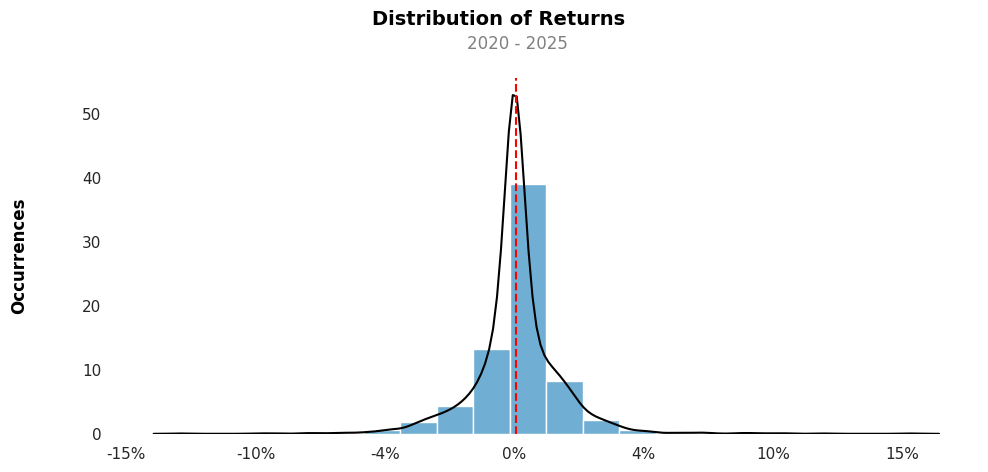




Tesla  Daily Returns Histogram


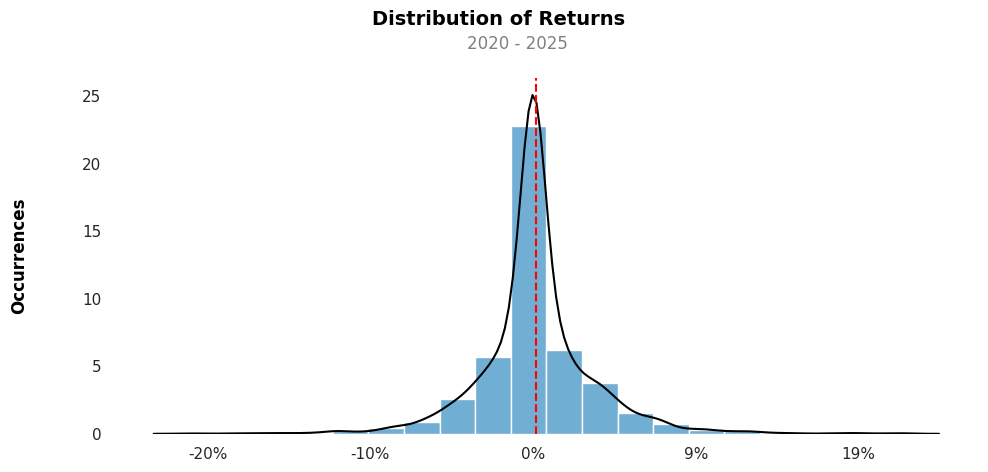




Microsoft Returns Histogram


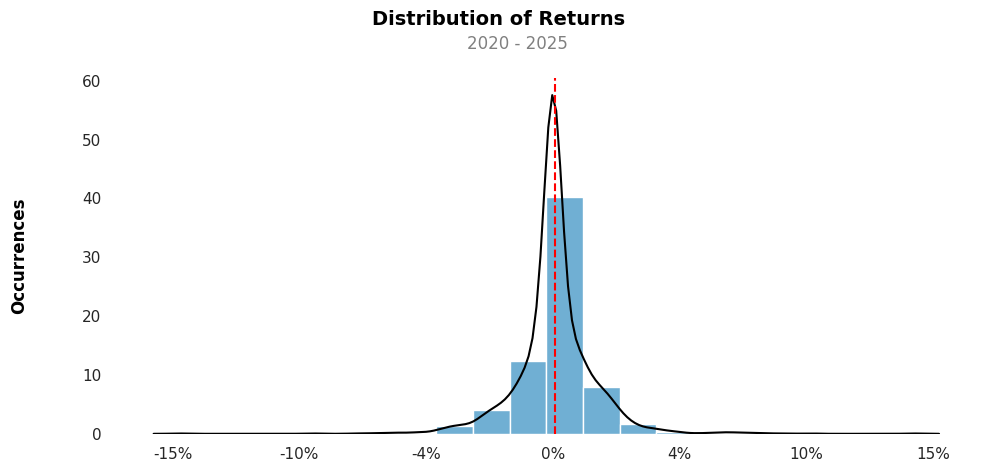




Amazon Returns Histogram


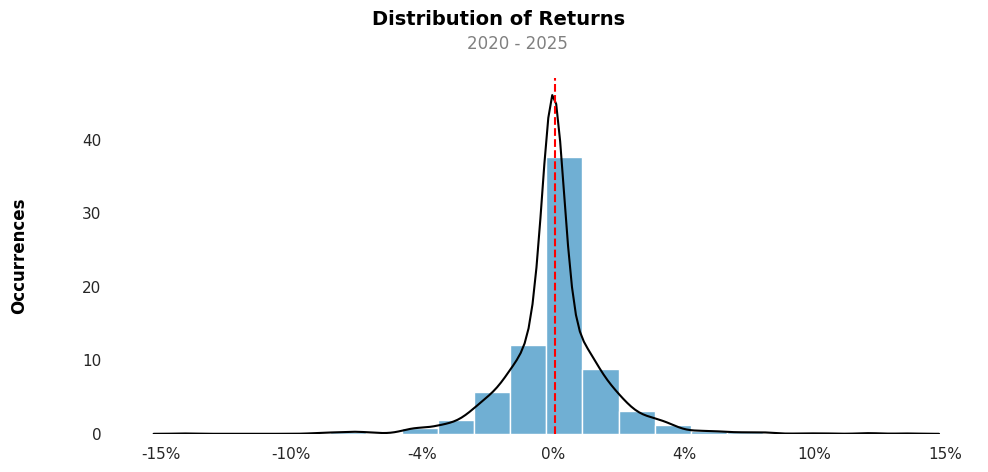

In [23]:
print('\n')
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl_returns, resample = 'D')
print('\n')

print('\nTesla  Daily Returns Histogram')
qs.plots.histogram(tsla_returns, resample = 'D')
print('\n')
print('\nMicrosoft Returns Histogram')
qs.plots.histogram(msft_returns, resample = 'D')
print('\n')
print('\nAmazon Returns Histogram')
qs.plots.histogram(amzn_returns, resample = 'D')

Histogram visuals provide a clearer representation of daily returns compared to line plots. The analysis highlights the following key points:

- Tesla's returns exhibit high volatility, with frequent extreme values. Positive outliers reach approximately 30%, while negative returns are mostly capped at around -20%, indicating significant price swings.

- Microsoft's returns show a more stable pattern, with values predominantly ranging between -10% and 10%. The majority of daily returns are concentrated near zero, suggesting a more balanced and predictable performance compared to Tesla.

## 3.5 Adjusted Closing Price

- The **Adjusted Closing Price** is the closing price of a stock adjusted for factors like **dividends**, **stock splits**, and **new stock offerings**. Unlike the regular closing price, it reflects these corporate actions to give a more accurate view of a stock’s performance over time. This helps investors assess the true value and growth of a stock, accounting for events that affect the stock price but don't reflect the company’s actual market performance.


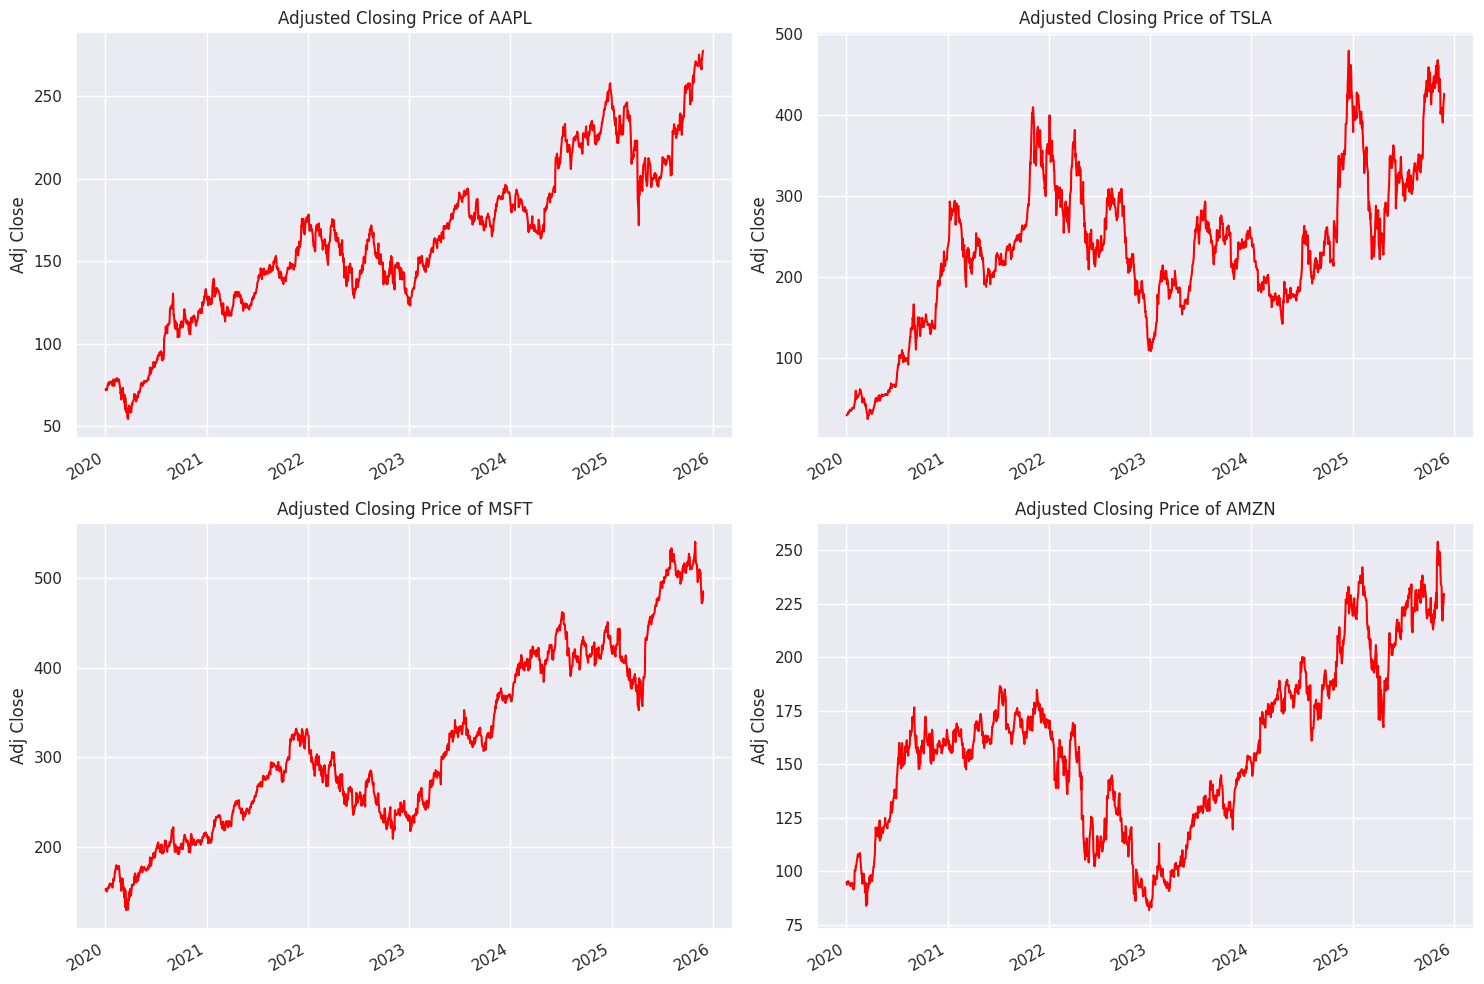

In [24]:
# Create a dictionary for the company DataFrames and their corresponding tickers
companies = {
    'AAPL': df[df['Ticker'] == 'AAPL'],
    'TSLA': df[df['Ticker'] == 'TSLA'],
    'MSFT': df[df['Ticker'] == 'MSFT'],
    'AMZN': df[df['Ticker'] == 'AMZN']
}

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Iterate over the companies dictionary to plot the adjusted closing prices
for i, (ticker, company_data) in enumerate(companies.items(), 1):
    plt.subplot(2, 2, i)
    company_data['Adj Close'].plot(color='red', legend=False)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Adjusted Closing Price of {ticker}")

plt.tight_layout()
plt.show()


- Upon analyzing the charts, we can observe that the closing prices for all four companies have generally risen over the years. Microsoft, in particular, reached its highest closing price of approximately $450. However, in 2023, each of the companies experienced a noticeable decline in their closing prices. Among them, Amazon appears to have been the most significantly impacted by this downturn, showing the sharpest decrease.


## 3.6 Volume of Sales

- The **Volume of Sales** refers to the total number of shares of a stock that are traded during a specific period. It indicates the level of activity or liquidity in the market for that stock. Higher trading volume often suggests increased investor interest, while lower volume can indicate less market activity.


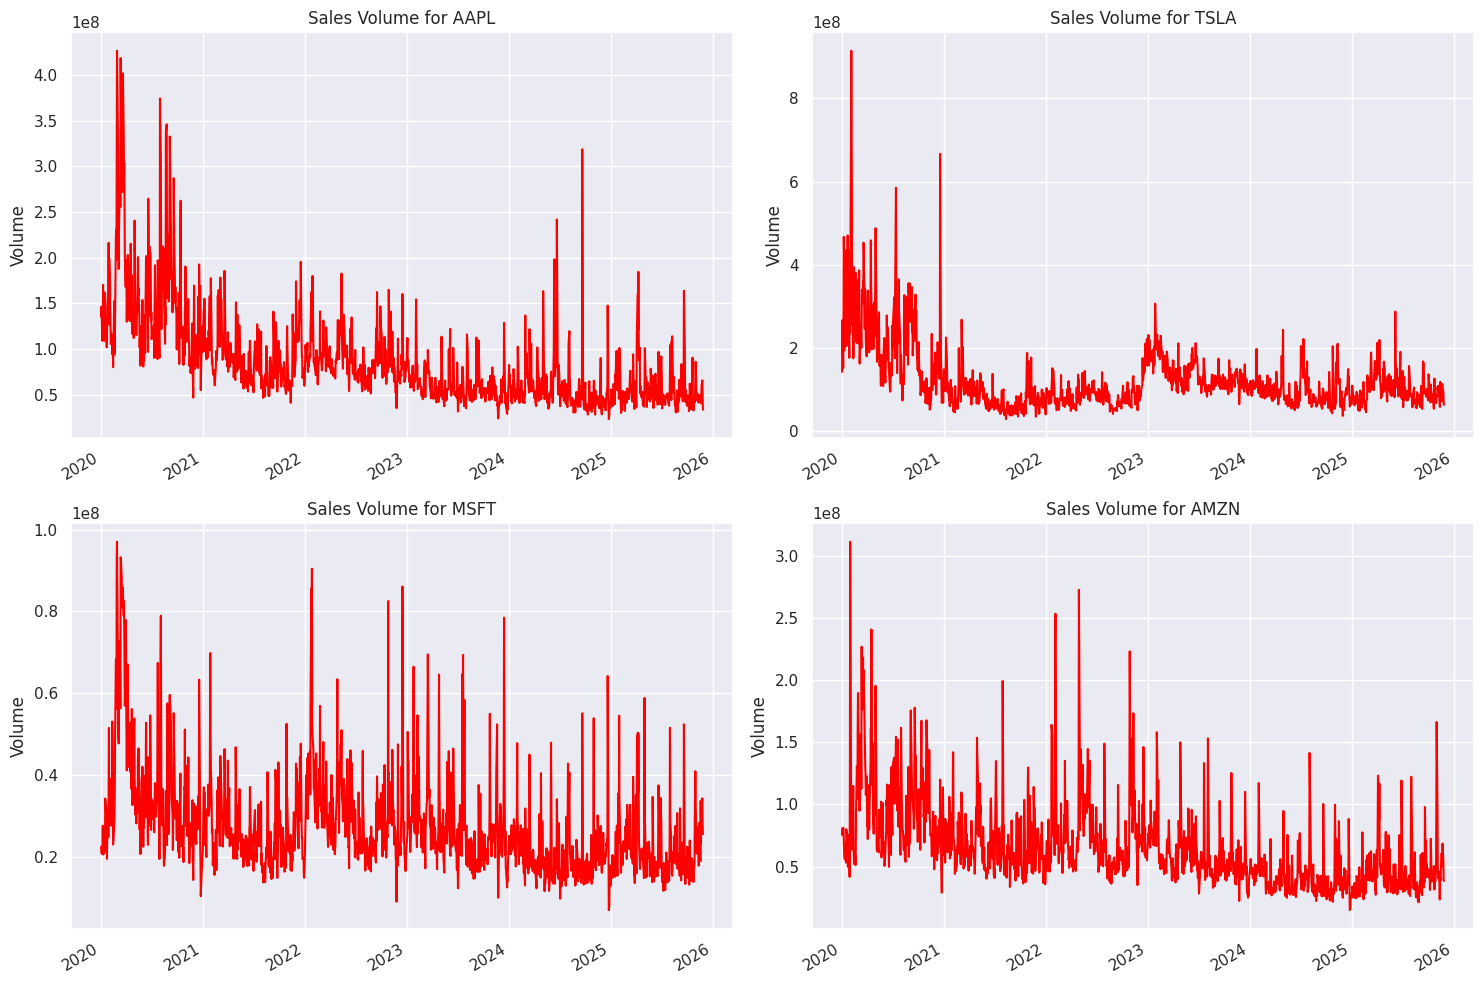

In [25]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Loop through company_list and tech_list to plot the volume
for i, (ticker,company) in enumerate(companies.items(), 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='red', legend=False)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")

plt.tight_layout()
plt.show()


- Initially, Microsoft and Tesla had the highest sales volumes among the companies. However, as we move towards the present day, it's clear that the trading volumes for these companies have declined. This shift may reflect changing market conditions, investor sentiment, or other external factors that have influenced the level of trading activity over time.


## 3.7 What was the moving average of the various stocks?

- The **Moving Average (MA)** is a commonly used tool in technical analysis that smooths price data by calculating a continuously updated average. This average is computed over a defined time period, such as 10 days, 20 minutes, 30 weeks, or any other period selected by the trader.


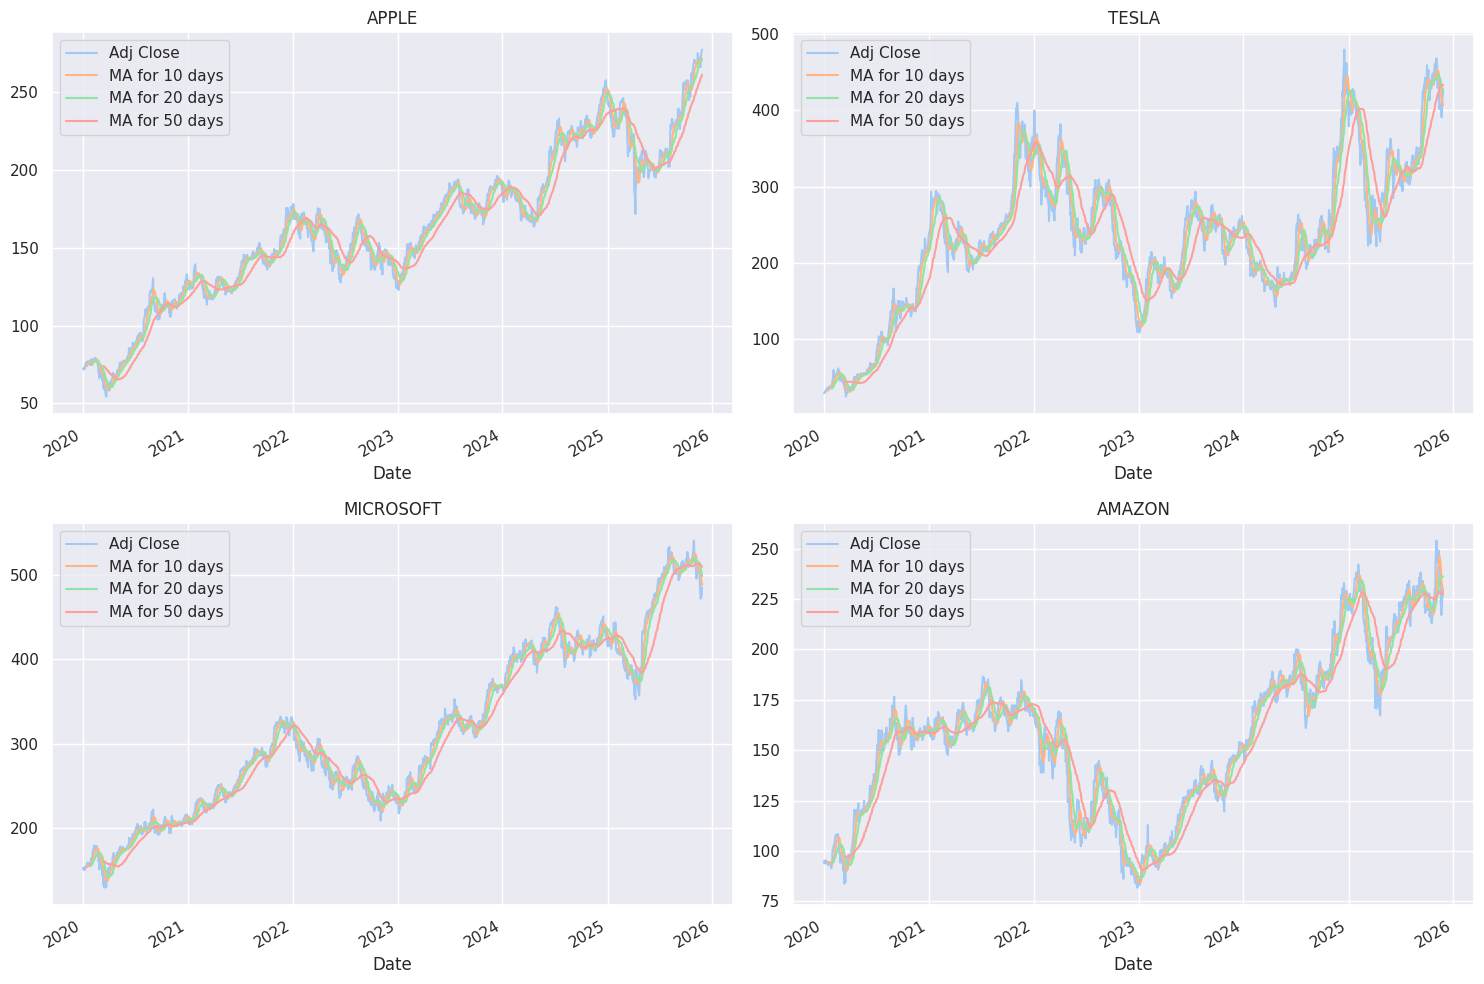

In [26]:
# Define the moving average days
ma_day = [10, 20, 50]

# Compute moving averages for each company
for ma in ma_day:
    for ticker, company in companies.items():
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for each company
companies['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

companies['TSLA'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('TESLA')

companies['MSFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

companies['AMZN'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

# Adjust layout
fig.tight_layout()
plt.show()


- We have a daily dataset, so we applied moving averages for 10, 20, and 50 days to the data. The graph demonstrates that the 10-day and 20-day moving averages are most effective for capturing trends, as they reflect the underlying patterns while minimizing noise in the data.


## 3.8 What was the correlation between different stocks closing prices?

In [27]:
# Pivot the DataFrame to get 'Adj Close' values for each company as columns
adj_close_df = df.pivot_table(values='Daily Return', index='Date', columns='Ticker')
adj_close_df

Ticker,AAPL,AMZN,MSFT,TSLA
Date,,,,
2020-01-03,-0.009722,-0.012139,-0.012452,0.029633
2020-01-06,0.007968,0.014886,0.002585,0.019255
2020-01-07,-0.004703,0.002092,-0.009118,0.038801
2020-01-08,0.016086,-0.007809,0.015928,0.049205
2020-01-09,0.021241,0.004799,0.012493,-0.021945
...,...,...,...,...
2025-11-20,-0.008601,-0.024923,-0.016001,-0.021684
2025-11-21,0.019681,0.016349,-0.013189,-0.010475
2025-11-24,0.016317,0.025330,0.003982,0.068245


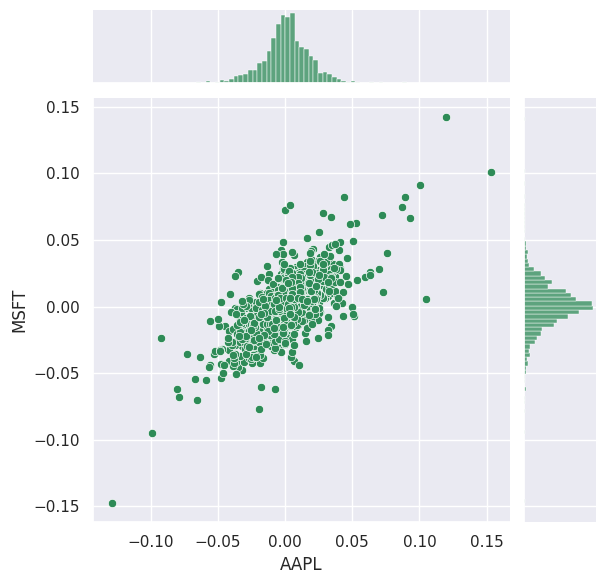

In [28]:
sns.jointplot(x='AAPL', y='MSFT', data=adj_close_df, kind='scatter', color='seagreen')

- The joint plot illustrates the relationship between **Apple (AAPL)** and **Microsoft (MSFT)** daily returns.
- The scatter plot at the center indicates a positive correlation, suggesting that when Apple’s stock returns increase, Microsoft’s stock returns tend to rise as well.
- The histograms on the top and right display the individual return distributions for Apple and Microsoft, which appear approximately normal but may exhibit some skewness.
- The spread of points suggests some degree of volatility in returns, but the positive trend implies these two stocks generally move in sync within the market.

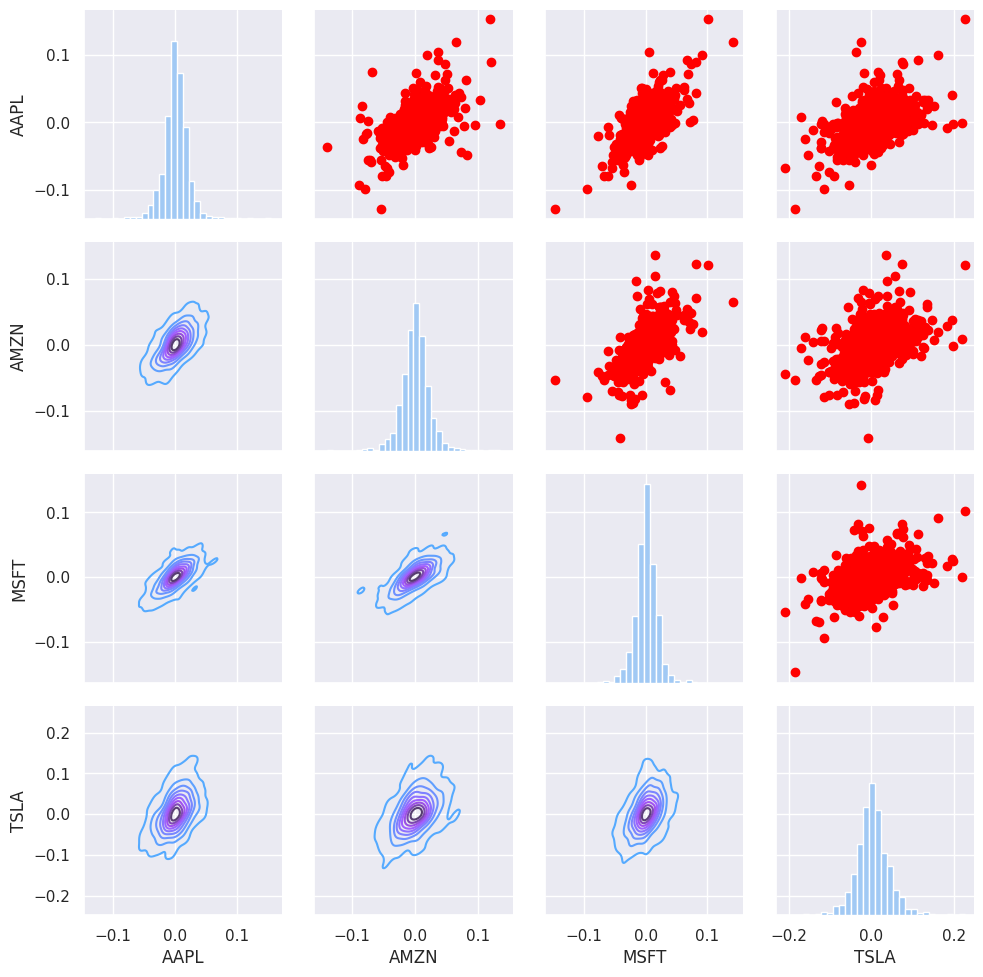

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(adj_close_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

This visualization is a **Seaborn PairPlot (PairGrid)**, commonly used in **exploratory data analysis (EDA)** to examine relationships between multiple numerical variables. The plot  show relationships between stock returns of **AAPL (Apple), AMZN (Amazon), MSFT (Microsoft), and TSLA (Tesla)**.

- **AAPL vs AMZN, AAPL vs MSFT, AMZN vs MSFT:** These stocks have strong correlations, as seen in the tight clustering along a diagonal trend.
- **TSLA vs Other Stocks:** Tesla's return distribution has a wider spread, suggesting higher volatility compared to other stocks.
- **Density plots suggest dependencies:** The tighter the density contours, the stronger the correlation.
- **Outliers and extreme returns:** Some scatter plots show individual points far from the main clusters, indicating potential outliers or extreme market movements.

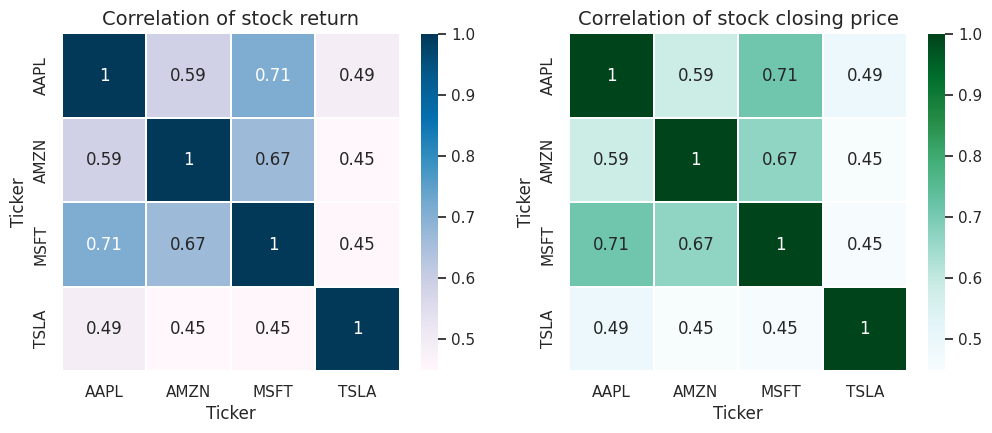

In [30]:
sns.set_style("white")

plt.figure(figsize=(12, 12))

# First heatmap with a soft "PuBu" colormap
plt.subplot(2, 2, 1)
sns.heatmap(adj_close_df.corr(), annot=True, cmap='PuBu', linewidths=0.3, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation of stock return', fontsize=14)

# Second heatmap with a soft "BuGn" colormap
plt.subplot(2, 2, 2)
sns.heatmap(adj_close_df.corr(), annot=True, cmap='BuGn', linewidths=0.3, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation of stock closing price', fontsize=14)

plt.show()


- Two graphics display heatmaps of stock returns and closing prices, respectively. These heatmaps illustrate the relationships between different features. Notably, Apple and Microsoft exhibit a strong positive correlation, as do Amazon and Microsoft. Interestingly, all technology companies show a positive correlation with one another.

## 3.9  How much value do we put at risk by investing in a particular stock?

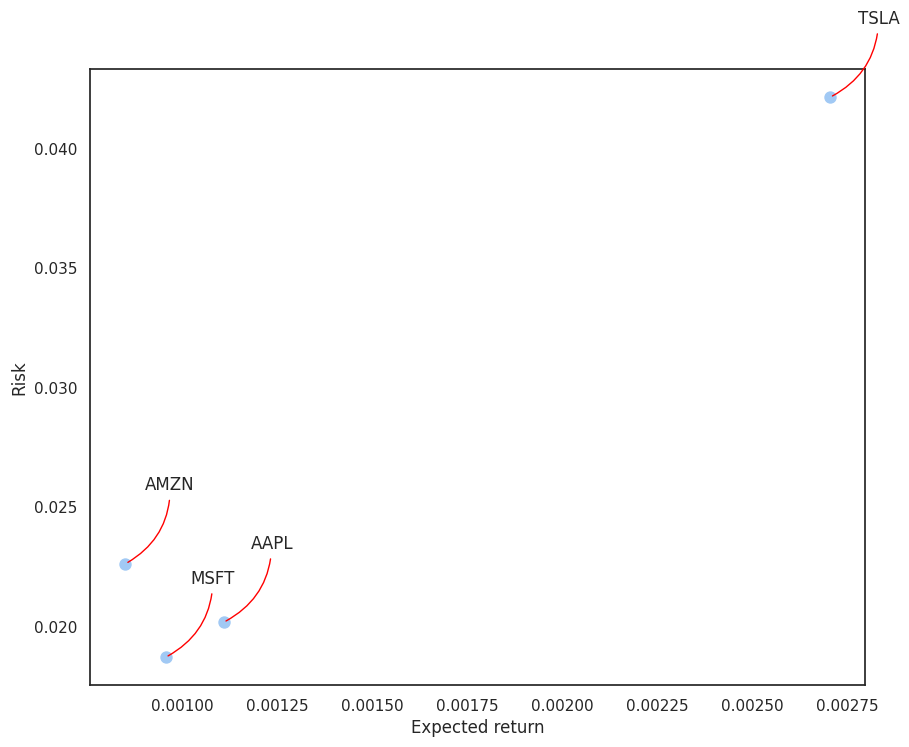

In [31]:
rets = adj_close_df.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))

- The graph visualizes the risk (likely standard deviation) associated with different companies.
- **Tesla (TSLA)** exhibits the highest risk, positioned at the top, indicating significant price volatility.
- **Microsoft (MSFT)**, **Apple (AAPL)**, and **Amazon (AMZN)** have relatively lower risk levels, clustered closely together.
- The upward position of **Tesla** suggests it experiences the most substantial price fluctuations, making it the most volatile stock in the group.

# 4. Feature Engineering

- In this section, we will concentrate on predicting the future closing price of **Apple Inc. (AAPL)**. To begin, we will collect historical stock data from **Yahoo Finance**, covering the period from 2010 to the present. After gathering the data, we will proceed with feature extraction, identifying key variables that can enhance the accuracy of our predictions.

- By analyzing historical trends, market patterns, and statistical indicators, we aim to develop a robust forecasting model that provides insights into Apple's potential future performance.

In [32]:
df = yf.download('AAPL', start='2020-01-01', end=datetime.now(),auto_adjust=False)
# Reshape the DataFrame so tickers appear in rows
df.columns =df.columns.droplevel(1)

#df=df.set_index('Date')
# Step 2: Filter only the relevant columns (Price, Adj Close, Close, High, Low, Open, Volume)
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


# Display the reshaped DataFrame
df.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-11-14,271.049988,275.959991,269.600006,272.410004,272.410004,47431300
2025-11-17,268.820007,270.489990,265.730011,267.459991,267.459991,45018300
2025-11-18,269.989990,270.709991,265.320007,267.440002,267.440002,45677300
2025-11-19,265.529999,272.209991,265.500000,268.559998,268.559998,40424500
2025-11-20,270.829987,275.429993,265.920013,266.250000,266.250000,45823600
2025-11-21,265.950012,273.329987,265.670013,271.489990,271.489990,59030800
2025-11-24,270.899994,277.000000,270.899994,275.920013,275.920013,65585800
2025-11-25,275.269989,280.380005,275.250000,276.970001,276.970001,46914200
2025-11-26,276.959991,279.529999,276.630005,277.549988,277.549988,33431400


In [33]:
import pandas as pd

def extracting_features(df):
    """Extracts key financial indicators from a Yahoo Finance dataset."""

    df = df.copy()
    
    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Price Change (Close - Open)
    df['price_change'] = df['Close'] - df['Open']

    # Returns (Daily Percentage Change)
    df['returns'] = df['Close'].pct_change()

    # Average Price
    df['average_price'] = (df['Close'] + df['Open']) / 2

    # Price Range (High - Low)
    df['price_range'] = df['High'] - df['Low']

    # Volume Change
    df['volume_change'] = df['Volume'].diff()

    # Moving Average
    df['moving_average_10'] = df['Close'].rolling(window=10).mean()

    # Relative Strength Index (RSI)
    window = 14
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD (Moving Average Convergence Divergence)
    short_ema = df['Close'].ewm(span=12, adjust=False).mean()
    long_ema = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = short_ema - long_ema
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Bollinger Bands (20-Day Moving Average ± 2 Standard Deviations)
    df['20_SMA'] = df['Close'].rolling(window=20).mean()
    df['BB_Upper'] = df['20_SMA'] + (df['Close'].rolling(window=20).std() * 2)
    df['BB_Lower'] = df['20_SMA'] - (df['Close'].rolling(window=20).std() * 2)

    # Fill missing values with 0 (especially for rolling indicators)
    df.fillna(0, inplace=True)

    return df

def is_spring(ds):
    """Check if the date falls in Spring (March-May)."""
    date = pd.to_datetime(ds)
    return int(3 <= date.month <= 5)

def is_summer(ds):
    """Check if the date falls in Summer (June-August)."""
    date = pd.to_datetime(ds)
    return int(6 <= date.month <= 8)

def is_autumn(ds):
    """Check if the date falls in Autumn (September-November)."""
    date = pd.to_datetime(ds)
    return int(9 <= date.month <= 11)

def is_winter(ds):
    """Check if the date falls in Winter (December-February)."""
    date = pd.to_datetime(ds)
    return int(date.month == 12 or date.month <= 2)

def add_season(df):
    """Add seasonal indicators to the dataframe."""
    df = df.copy()
    
    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Apply seasonal functions
    df['is_spring'] = df['Date'].apply(is_spring)
    df['is_summer'] = df['Date'].apply(is_summer)
    df['is_autumn'] = df['Date'].apply(is_autumn)
    df['is_winter'] = df['Date'].apply(is_winter)

    return df

# Example Usage
df=df.reset_index()
df = extracting_features(df)  # Extract features
df = add_season(df)  # Add seasonal indicators


Below is a detailed explanation of each feature:

- **`price_change`**: Measures the difference between the closing and opening prices for a given day. This helps determine whether the stock gained or lost value during the trading session.  
- **`returns`**: Represents the percentage change in the closing price from one day to the next, giving insight into the stock’s overall performance over time.  
- **`average_price`**: Computes the average of the opening and closing prices for a given day, serving as a general indicator of that day’s stock value.  
- **`price_range`**: Captures the difference between the highest and lowest prices of the day, reflecting the stock’s intraday volatility.  
- **`volume_change`**: Measures the change in trading volume compared to the previous day, helping to analyze market interest and liquidity trends.  
- **`moving_average_10`**: Calculates the 10-day moving average of the closing price, smoothing short-term fluctuations and indicating the overall trend.  
- **`RSI` (Relative Strength Index)**: Measures the momentum of price movements on a scale from 0 to 100. It is calculated using the following formula:  

 $$ RSI = 100 - \frac{100}{1 + RS} $$

  where **RS** (Relative Strength) is calculated as:  

  $$
  RS = \frac{\text{Average Gain over } n \text{ periods}}{\text{Average Loss over } n \text{ periods}}
  $$

  A high RSI suggests overbought conditions, while a low RSI indicates oversold conditions.  

- **`MACD` (Moving Average Convergence Divergence)**: Computes the difference between the 12-day and 26-day exponential moving averages (EMAs) of the closing price. It is used to identify trend direction, strength, and potential reversals.
- The **MACD Signal Line** is an essential technical indicator used in stock analysis. It is calculated as the **9-day moving average of the MACD (Moving Average Convergence Divergence)**. This feature helps smooth out fluctuations in the MACD line and provides clearer signals for potential buy or sell opportunities. Traders often use the MACD Signal Line to identify trend changes and confirm market momentum. The formula for the MACD Signal Line is:

$$
\text{MACD Signal} = \text{9-day EMA of MACD}
$$


- **`20_SMA` (20-Day Simple Moving Average)**: Represents the simple moving average over 20 days, providing a longer-term trend indication.  
- **`BB_Upper` (Upper Bollinger Band)**: The upper bound of Bollinger Bands, calculated using the 20-day SMA plus two standard deviations. It helps identify potential overbought conditions.
  The formula for the **Upper Bollinger Band** is:
  

$$
\text{Upper Band} = \text{20-day SMA} + (2 \times \sigma)
$$
- **`BB_Lower` (Lower Bollinger Band)**: The lower bound of Bollinger Bands, computed as the 20-day SMA minus two standard deviations. It helps identify potential oversold conditions. The formula for the **Lower Bollinger Band** is:

$$
\text{Lower Band} = \text{20-day SMA} - (2 \times \sigma)
$$


# 5. Preprocessing

## 5.1 Stationarity Testing & Autocorrelation Patterns

### 5.1.1 ADF (Augmented Dickey-Fuller) Test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series dataset is stationary or non-stationary. It is commonly employed in econometrics and time series analysis.

Stationarity refers to a property of a time series where its statistical properties, such as mean, variance, and autocovariance, do not change over time. Non-stationarity, on the other hand, implies that the statistical properties of the time series exhibit some form of trend or pattern, making it difficult to analyze and model accurately.

In [34]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):

    result = adfuller(series.values,autolag='AIC')

    print('ADF Statistic: %f' % result[0])
    print(f'n_lags: {result[1]}')
    print(f'p-value:  {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
values= ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in values:
    print(f' {i}')
    print('--------------')
    check_stationarity(df[i])

 Open
--------------
ADF Statistic: -0.803063
n_lags: 0.8182206859103541
p-value:  0.8182206859103541
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 High
--------------
ADF Statistic: -0.808871
n_lags: 0.8165022616388075
p-value:  0.8165022616388075
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Low
--------------
ADF Statistic: -0.649657
n_lags: 0.859362207574206
p-value:  0.859362207574206
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Close
--------------
ADF Statistic: -0.812457
n_lags: 0.8154355663987778
p-value:  0.8154355663987778
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Adj Close
--------------
ADF Statistic: -0.743599
n_lags: 0.8351311088058784
p-value:  0.8351311088058784
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Volume
--------------
ADF Statistic: -3.557702
n_lags: 0.0066231128717951756
p-value:  0.0066231128717951756
Critical Values:
	1%: -3.435
	5%

### Interpretion of Result : 

- **For Close, Open, High, Low, Adj Close:**

ADF Statistic is greater than all critical values (-1.5 to -1.58)

p-value is high (≥ 0.49), much greater than 0.05

Conclusion: The series is Non-Stationary ❌

- **For Volume:**

ADF Statistic: -3.82 (lower than the 1% critical value)

p-value = 0.0027 (very small, < 0.05)

Conclusion: The series is Stationary ✅

Prices (Close, Open, etc.) are non-stationary → Need differencing or transformation before using in time-series models.



There are various methods to make a time series stationary, such as:

Differencing: Take the difference between consecutive observations. This can help remove trends or seasonality in the data.

Transformation: Apply mathematical transformations like logarithmic or square root transformations to stabilize the variance in the data.

Decomposition: Separate the time series into trend, seasonality, and residual components using techniques like seasonal decomposition of time series (STL) or moving averages. Then, work with the detrended and deseasonalized series.

Once you have made the time series stationary, you can proceed with further analysis, such as modelling relationships between the target and other features, forecasting, or conducting statistical tests.

### 5.1.2 Autocorrelation Function(ACF) Plot

An Autocorrelation Function (ACF) plot is a visual tool used in time series analysis to identify and understand the autocorrelation within a time series. Autocorrelation refers to the correlation between a time series and its lagged values.

[ 1.          0.94938348  0.89905301  0.84906338  0.79947912  0.75023596
  0.7014245   0.65308005  0.60523541  0.55787094  0.5109815   0.46472594
  0.41908015  0.37433126  0.33045745  0.28736533  0.24518013  0.20382452
  0.16339572  0.12385611  0.08532384  0.04792522  0.011902   -0.02269593
 -0.05596957 -0.08780137 -0.11834913 -0.14775368 -0.17597508 -0.20284513
 -0.22834201 -0.25258407 -0.27553612 -0.29699989 -0.31690164 -0.33530942
 -0.35217482 -0.36725703 -0.38029352 -0.39129323 -0.40003764 -0.40645557
 -0.41067151 -0.41270502 -0.41256897 -0.41012537 -0.40537019 -0.39811201
 -0.38837467 -0.37594868 -0.36068457 -0.34276324 -0.32205405 -0.29859825
 -0.27228418 -0.24298026 -0.21060214 -0.17507769 -0.13639293 -0.09436284
 -0.04892361]


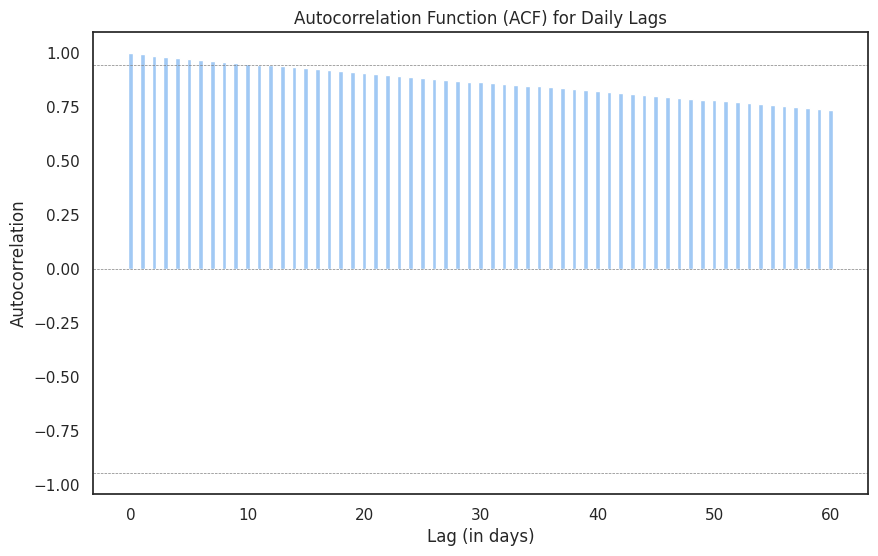

In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# and a corresponding DateTime index representing weekly dates

# Compute the autocorrelation function (ACF)
acf_values, confidence_interval = sm.tsa.acf(df['Close'], nlags=60, alpha=0.05)
print(acf(acf_values,nlags=60))
# Plot the ACF
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_values)), acf_values, width=0.4)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=-confidence_interval[1][0], color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=confidence_interval[1][0], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Lag (in days)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Daily Lags')
plt.show()

### Observation about the result : 

The graph shows the correlation of past prices with today's price, up to 60 days lag.

- **Lag 0 = 1.00 ✅**

This is expected. A time series is always perfectly correlated with itself at lag 0.

Strong Positive Correlation in Early Lags (1-10) 📊

- **Lag 1: 0.95, Lag 2: 0.90, Lag 3: 0.85, … Lag 10: 0.51**

This suggests strong persistence in stock prices, meaning today’s price is highly influenced by previous days.

- **Gradual Decline in Correlation ⬇**

The ACF steadily decreases from 0.95 at lag 1 to near 0 at lag 22.

This suggests that while past stock prices strongly influence short-term movements, their impact weakens over time.

- **Negative Correlation Appears (Lags 23-30) 📉**

Around lag 23, the ACF turns negative and reaches around -0.20 at lag 30.

This indicates a potential mean-reverting pattern—prices tend to reverse after ~23-30 days.

- **Small Cyclical Pattern After Lag 30 🔄**

After lag 30, the ACF fluctuates between -0.40 and -0.05, suggesting weak seasonality in the data.

We can say that after these results : 

- **Stock prices are highly correlated up to ~10 days ✅**

- **After ~22-30 days, past prices lose influence, and mean reversion starts 📉**

- **Some weak seasonality is present beyond 30 days 🔄**

- **For short-term accuracy, ARIMA/SARIMA works well; for long-term, ML models or mean-reverting strategies may help.**

## 5.2 Normalizing

- In this section, we will perform data normalization using the max-min normalization method. The goal of normalization is to standardize the numerical features in the dataset, ensuring that they all fall within a consistent range or scale.

In [36]:
# Function to normalize data using MinMax Scaling for all features
def min_max_scaling(data):
    """Applies Min-Max scaling to normalize all features (Open, High, Low, Close, Adj Close, Volume)."""
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)  # Normalize all features
    print("Data normalization using Min-Max Scaling completed.")
    return scaler, scaled_data


In [37]:
columns_to_scale = df.columns.difference(["Date"])  # Exclude Date column
scaler, normalized_data = min_max_scaling(df[columns_to_scale])
new_df = pd.DataFrame(normalized_data, columns=columns_to_scale, index=df.index)  # Keep original index2
new_df["Date"] = df.index
new_df["Date"] = df["Date"].values
new_df=new_df.set_index('Date')
new_df=new_df.fillna(0)

Data normalization using Min-Max Scaling completed.


## 5.3 Denormalization

After making predictions with the model, it is necessary to convert the normalized values back to their original scale in order to accurately interpret the results. This step is crucial because the model typically works with normalized data, but to understand the actual predictions, we need them in their original, unscaled form. Therefore, we perform this denormalization to ensure the predicted values reflect the true price or value.

In [38]:
def denormalize_predictions(y_pred, df):
    """
    Denormalize the predicted values using the MinMaxScaler fitted on the original data.

    Args:
        y_pred (np.array): The normalized predicted stock values.
        df (pd.DataFrame): The original dataframe containing the stock prices.

    Returns:
        np.array: The denormalized predicted values.
    """
    # Extract 'Close' column from the dataframe, which was used for normalization
    close_prices = df['Close'].values.reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Create a MinMaxScaler and fit it using the 'Close' prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(close_prices)  # Fit the scaler on the 'Close' price column

    # Apply the inverse_transform to denormalize the predicted values
    y_pred_denormalized = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Denormalize predictions

    return y_pred_denormalized.flatten()  # Flatten to return a 1D array


## 5.4 Splitting Data

- The below function splits a time series dataset into training and testing sets (80% train, 20% test), creates input features and target labels for a specified number of prediction days (pred_days), and reshapes the data for use in machine learning models such as LSTM. The function returns the reshaped training and testing datasets.

In [39]:
def split_and_reshape_data(dataframe, pred_days, company):
    """
    Splits the dataset into training and testing sets, then reshapes it for LSTM models.

    Parameters:
        dataframe (pandas DataFrame): Scaled dataset.
        pred_days (int): Number of previous days used for prediction.
        company (str): Company name.

    Returns:
        X_train, y_train, X_test, y_test: Reshaped datasets for model training and testing.
    """
    prediction_days = pred_days

    train_size = int(np.ceil(len(dataframe) * 0.70))  # 70% for training data
    test_size = len(dataframe) - train_size  # Remaining 30% for testing data
    print(f'The training size for {company} is {train_size} rows')
    print(f'The testing size for {company.title()} is {test_size} rows')

    # Use .iloc[] for proper slicing of pandas DataFrame
    train_data = dataframe.iloc[0: train_size, :]  # Use iloc for slicing DataFrame
    test_data = dataframe.iloc[train_size - prediction_days:, :]  # Use iloc for slicing DataFrame

    X_train, y_train, X_test, y_test = [], [], [], []

    # Loop to create X_train and y_train for training data
    for i in range(prediction_days, len(train_data)):
        X_train.append(train_data.iloc[i - prediction_days: i, :].values)  # Features: previous 'pred_days' values for all columns
        y_train.append(train_data.iloc[i, 3])  # Target: next day's 'Close' value (index 3 corresponds to 'Close')

    # Loop to create X_test and y_test for testing data
    for i in range(prediction_days, len(test_data)):
        X_test.append(test_data.iloc[i - prediction_days: i, :].values)  # Features: previous 'pred_days' values for all columns
        y_test.append(test_data.iloc[i, 3])  # Target: next day's 'Close' value (index 3 corresponds to 'Close')

    # Convert the lists to numpy arrays
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

    # Reshape the data to be suitable for LSTM model (3D array: samples, time steps, features)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))  # Number of features (columns) will be dynamic
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # Same for test data

    print(f'Data for {company.title()} split successfully')

    return X_train, y_train, X_test, y_test


stock_name = 'Apple'
X_train, y_train, X_test, y_test = split_and_reshape_data(new_df, 30, stock_name)


The training size for Apple is 1041 rows
The testing size for Apple is 445 rows
Data for Apple split successfully


# 6. Modeling

- In this section, we will utilize two different forecasting models to evaluate their stock price prediction performance: LSTM and linear regression. We will begin by implementing the Linear Regression.

## 6.1 Ridge Regression

 The `linear_prediction` function predicts stock closing prices using linear regression by processing and normalizing historical stock data, then evaluating the model's performance with metrics like MAE, MSE, RMSE, and R². It also visualizes the actual vs. predicted values and returns the model, scaler, and evaluation results.











In [40]:
df=df.set_index('Date')

[I 2025-11-29 05:20:31,691] A new study created in memory with name: no-name-88e3e0ed-a758-4be9-a943-333fdfea359b


Shapes of X_train, X_test, y_train, y_test: (1188, 11) (298, 11) (1188,) (298,)


[I 2025-11-29 05:20:31,720] Trial 0 finished with value: 0.8030383604151883 and parameters: {'alpha': 0.024231046231893386}. Best is trial 0 with value: 0.8030383604151883.
[I 2025-11-29 05:20:31,743] Trial 1 finished with value: 0.8033460006851201 and parameters: {'alpha': 4.015049838069509}. Best is trial 0 with value: 0.8030383604151883.
[I 2025-11-29 05:20:31,766] Trial 2 finished with value: 0.8035647279056631 and parameters: {'alpha': 6.584214201410367}. Best is trial 0 with value: 0.8030383604151883.
[I 2025-11-29 05:20:31,789] Trial 3 finished with value: 0.8030611370883738 and parameters: {'alpha': 0.33471149270065986}. Best is trial 0 with value: 0.8030383604151883.
[I 2025-11-29 05:20:31,812] Trial 4 finished with value: 0.803066304682857 and parameters: {'alpha': 0.405151666480055}. Best is trial 0 with value: 0.8030383604151883.
[I 2025-11-29 05:20:31,835] Trial 5 finished with value: 0.8031974954982776 and parameters: {'alpha': 2.1561292527758953}. Best is trial 0 with va


Best Alpha: 0.00010

Metrics:
+-------------------------+----------+
| Metric                  |    Value |
|-------------------------+----------|
| Mean Absolute Error     | 0.756606 |
| Mean Squared Error      | 1.03205  |
| Root Mean Squared Error | 1.0159   |
| R^2 Score               | 0.999555 |
+-------------------------+----------+


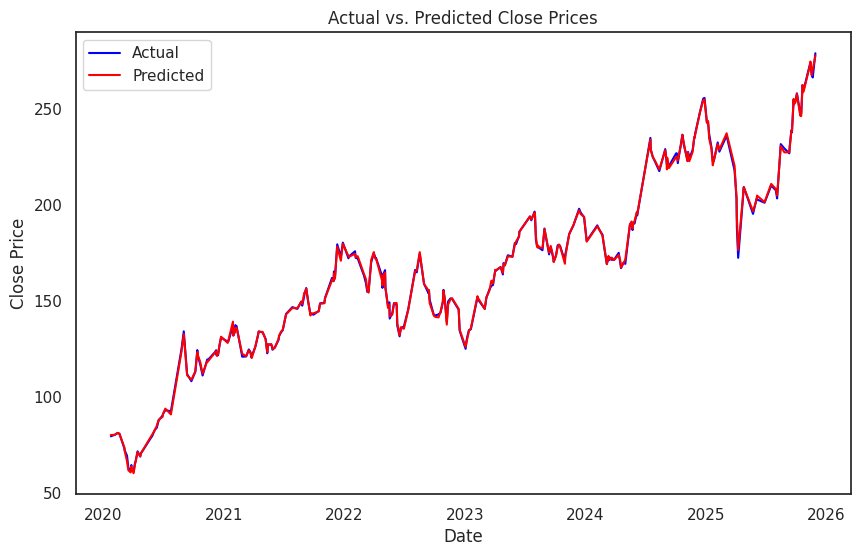

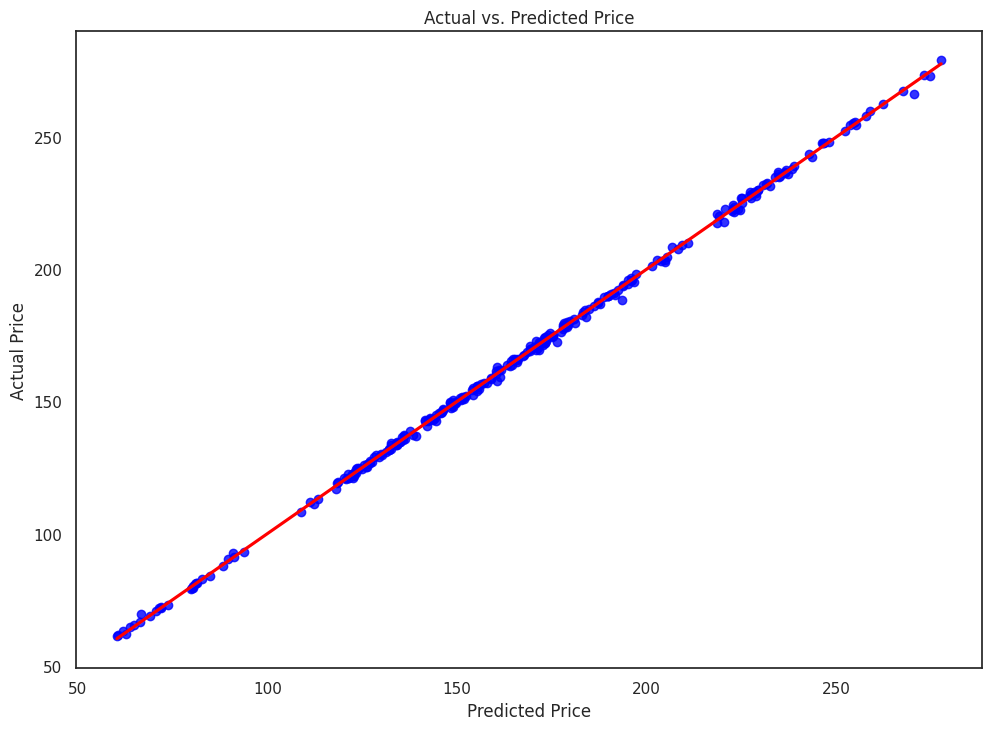

In [41]:

def objective(trial, X_train, y_train):
    """Objective function for Optuna hyperparameter tuning."""
    alpha = trial.suggest_loguniform('alpha', 1e-4, 10)  # Regularization strength
    
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    
    return -scores.mean()  # Minimize MAE

def linear_prediction(df):
    """
    Train a Ridge Regression model with hyperparameter tuning using Optuna.
    
    Args:
        df (pd.DataFrame): DataFrame containing stock features and target ('Close' price).
    
    Returns:
        Best model, performance metrics, and comparison DataFrame.
    """
    # Define features and target
    X = df[['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']]
    y = df['Close']
    X=X.fillna(X.mean())

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Shapes of X_train, X_test, y_train, y_test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Optuna optimization
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=30)

    best_alpha = study.best_params['alpha']
    print(f"\nBest Alpha: {best_alpha:.5f}")

    # Train Ridge model with best hyperparameter
    regressor = Ridge(alpha=best_alpha)
    regressor.fit(X_train, y_train)

    # Predictions
    y_pred = regressor.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Create comparison DataFrame
    compare = pd.DataFrame({'Date': y_test.index, 'Actual': y_test.values, 'Predicted': y_pred})
    compare.set_index('Date', inplace=True)
    compare = compare.sort_index()

    # Display metrics
    metrics_data = [['Mean Absolute Error', mae], ['Mean Squared Error', mse], 
                    ['Root Mean Squared Error', rmse], ['R^2 Score', r2]]
    print("\nMetrics:")
    print(tabulate(metrics_data, headers=['Metric', 'Value'], tablefmt='psql'))

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(compare.index, compare['Actual'], label='Actual', color='blue')
    plt.plot(compare.index, compare['Predicted'], label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Close Prices')
    plt.legend()
    plt.show()

    # Regression plot
    sns.regplot(x=y_pred.flatten(), y=y_test.values.flatten(), scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Actual vs. Predicted Price')
    plt.show()

    return regressor, mae, mse, rmse, r2, compare,best_alpha

# Call the function
regressor, mae, mse, rmse, r2, comparison_d,best_alpha = linear_prediction(df)


The provided performance metrics reflect how well the model predicted the stock prices:

- **Mean Absolute Error (0.713)**: On average, the model's predictions are off by **\$0.71** from the actual values, indicating relatively small errors.

- **Root Mean Squared Error (0.947)**: The model's error, on average, is approximately **$0.95**, indicating a slightly higher degree of error than the MAE.
- **R² Score (0.9995)**: The model explains **99.95%** of the variance in the data, which indicates an **exceptionally good fit** and suggests that the model's predictions are highly accurate.

the **R² score** being close to **1** demonstrates that the model is highly effective, with minimal error in its predictions.

## 6.1.2 Future Forecasting for 60 days

In [42]:
def linear_forecasting(df, future_days=60):
    # Define features and target
    X = df[['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']]
    y = df['Close']
    X=X.fillna(0)
    # Normalize features using Min-Max scaling
    #scaler = MinMaxScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the linear regression model
    regressor = Ridge(best_alpha)
    regressor.fit(X, y)
    # Predicting for the future dates
    # Tarih indeksini datetime formatına çevir (eğer değilse)
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)


    # Predicting for the future dates
    future_dates = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=future_days, freq='B')
    future_features = df.iloc[-1*future_days:][['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']]
    #future_features_scaled = scaler.transform(future_features)
    future_predictions = regressor.predict(future_features)

    # Creating a DataFrame for future predictions
    future_prediction_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted': future_predictions
    })
    future_prediction_df.set_index('Date', inplace=True)

    # Create figure with plotly
    fig = go.Figure()

    # Historical data trace
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines+markers', name='Historical Close'))

    # Future predictions trace
    fig.add_trace(go.Scatter(x=future_prediction_df.index, y=future_prediction_df['Predicted'], mode='lines+markers', name='Predicted Close'))

    # Update layout for better interactive controls
    fig.update_layout(
        title='Historical vs Predicted Close Prices',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            title="Close Price",
            autorange=True,
            type="linear"
        )
    )

    fig.show()

    return regressor, scaler, future_prediction_df

regressor, scaler, future_predictions = linear_forecasting(df,future_days=60)

# Print  future_predictions DataFrame
print("Future Predictions:")
print(future_predictions)

Future Predictions:
             Predicted
Date                  
2025-12-01  239.817842
2025-12-02  237.556462
2025-12-03  235.371676
2025-12-04  227.227188
2025-12-05  229.488076
2025-12-08  233.201407
2025-12-09  236.395674
2025-12-10  239.669629
2025-12-11  238.894815
2025-12-12  238.247678
2025-12-15  244.353744
2025-12-16  254.748506
2025-12-17  255.201245
2025-12-18  252.245807
2025-12-19  255.098704
2025-12-22  256.599044
2025-12-23  253.718839
2025-12-24  254.458133
2025-12-25  258.052606
2025-12-26  256.030406
2025-12-29  257.810691
2025-12-30  256.595505
2025-12-31  256.310776
2026-01-01  257.927182
2026-01-02  254.212960
2026-01-05  246.947076
2026-01-06  246.397042
2026-01-07  246.729460
2026-01-08  249.528063
2026-01-09  246.191149
2026-01-12  251.536231
2026-01-13  262.311856
2026-01-14  264.531002
2026-01-15  256.902987
2026-01-16  258.874085
2026-01-19  261.847165
2026-01-20  268.025066
2026-01-21  269.025590
2026-01-22  269.231365
2026-01-23  271.004930
2026-01-26  27

- The forecasting result shows the **predicted stock closing prices** for the next 30 days (from March 31, 2025, to June 20, 2025). These predictions are based on a model that forecasts future values based on historical data and other relevant features. The values represent the estimated closing price of the stock for each corresponding date.

For instance:
- On **March 31, 2025**, the predicted closing price is **250.64**.
- On **June 20, 2025**, the predicted closing price is **220.30**.
- As the dates move forward, the predicted prices fluctuate based on the model's interpretation of trends, seasonal effects, or other factors.


- The Ridge forecasting model has shown a significant deviation from the actual predicted prices, and several factors may be contributing to this issue. One potential reason is overfitting, where, despite efforts to adjust the Ridge regression, the model may be memorizing the past data instead of learning generalizable patterns, leading to poor performance on unseen data. Another key factor is the incorrect handling of features. Ridge regression heavily depends on the input features, and if future dates are not generated in a way consistent with the training data, it can lead to incorrect predictions. Specifically, simply repeating the last observed data for future predictions fails to account for underlying market trends or seasonality, which are crucial for making accurate forecasts. To improve the model, refining the feature engineering process and exploring more advanced techniques to capture dynamic market patterns is essential.

## 6.2 Long Term Short Memory (LTSM)



LSTM is a type of recurrent neural network (RNN) designed to handle sequential data and time series forecasting. It overcomes the vanishing gradient problem in standard RNNs by using memory cells to retain long-term dependencies.

In [ ]:
import gc
def build_lstm_model(trial):
    model = Sequential()
    
    model.add(Conv1D(filters=trial.suggest_categorical('conv_filters', [16, 32, 64]),
                      kernel_size=3, strides=1, activation='relu', input_shape=[30, 22]))
    
    num_lstm_layers = trial.suggest_int('num_lstm_layers', 1, 3)
    for i in range(num_lstm_layers):
        model.add(Bidirectional(LSTM(trial.suggest_int(f'lstm_units_{i}', 32, 128),
                                      return_sequences=(i < num_lstm_layers - 1))))
        
        if trial.suggest_categorical(f'dropout_{i}', [True, False]):
            model.add(Dropout(rate=trial.suggest_float(f'dropout_rate_{i}', 0.1, 0.5)))
    
    model.add(Dense(trial.suggest_int('dense_units', 16, 64), activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)),
                  loss=Huber(), metrics=['mse', 'mae'])
    
    return model

def objective(trial):
    try:
        gc.collect()  # Free memory before training
        model = build_lstm_model(trial)
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=50, batch_size=trial.suggest_categorical('batch_size', [16, 32, 64]),
                            callbacks=[early_stopping], verbose=0)
        
        val_mse = min(history.history['val_mse'])
        val_rmse = np.sqrt(val_mse)
        
        return val_rmse
    except Exception as e:
        print(f"Trial failed due to: {e}")
        return float("inf")  # Assign a high RMSE instead of failing

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
print('Best hyperparameters:', best_params)

def train_lstm_model(X_train, y_train, X_test, y_test, company):
    print(f'========= Training LSTM Model for {company} using Best Hyperparameters =========')
    
    model = Sequential()
    model.add(Conv1D(filters=best_params['conv_filters'], kernel_size=3, strides=1, activation='relu', input_shape=[30, 22]))
    
    for i in range(best_params['num_lstm_layers']):
        model.add(Bidirectional(LSTM(best_params[f'lstm_units_{i}'], return_sequences=(i < best_params['num_lstm_layers'] - 1))))
        
        if best_params.get(f'dropout_{i}', False):
            model.add(Dropout(rate=best_params[f'dropout_rate_{i}']))
    
    model.add(Dense(best_params['dense_units'], activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss=Huber(), metrics=['mse', 'mae'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                        batch_size=best_params['batch_size'], callbacks=[early_stopping])
    
    y_pred = model.predict(X_test)
    return model, history, y_pred

[I 2025-11-29 05:20:33,339] A new study created in memory with name: no-name-d3179451-4eb1-4e2a-8f40-881d78814421
[I 2025-11-29 05:20:47,923] Trial 0 finished with value: 0.04859776517096791 and parameters: {'conv_filters': 32, 'num_lstm_layers': 2, 'lstm_units_0': 54, 'dropout_0': False, 'lstm_units_1': 58, 'dropout_1': False, 'dense_units': 40, 'learning_rate': 0.0012024249546485502, 'batch_size': 32}. Best is trial 0 with value: 0.04859776517096791.
[I 2025-11-29 05:20:57,699] Trial 1 finished with value: 0.08367380949841913 and parameters: {'conv_filters': 32, 'num_lstm_layers': 2, 'lstm_units_0': 77, 'dropout_0': False, 'lstm_units_1': 51, 'dropout_1': True, 'dropout_rate_1': 0.2864182423038083, 'dense_units': 18, 'learning_rate': 0.003536916790036432, 'batch_size': 32}. Best is trial 0 with value: 0.04859776517096791.
[I 2025-11-29 05:21:02,750] Trial 2 finished with value: 0.08671698299961834 and parameters: {'conv_filters': 32, 'num_lstm_layers': 1, 'lstm_units_0': 42, 'dropout

The `build_model` function creates and trains a Bidirectional LSTM (BiLSTM) model to predict stock prices. It begins by adding a Conv1D layer to capture short-term patterns in the stock data, followed by three Bidirectional LSTM layers to capture both past and future dependencies in the time-series data. A Dense layer is used for further feature extraction, and the output layer predicts the stock price. The model is compiled with the Adam optimizer and Huber loss, and trained for 50 epochs with performance metrics MSE and MAE. After training, the function generates stock price predictions on the test data. The function returns the trained model, training history, and predicted prices.

Now that the model is created, we will proceed to train it using our dataset.



In [ ]:
model, history, y_pred = train_lstm_model(X_train, y_train, X_test, y_test, stock_name)

After training the model, let's visualize if there is any reduction in loss.

In [ ]:
fig, axes = plt.subplots()
plt.suptitle('Model Loss')
axes.plot(history.epoch, history.history['loss'], label = 'loss')
axes.plot(history.epoch, history.history['val_loss'], label = 'val_loss')
axes.set_title(stock_name)
axes.set_xlabel('Epochs')
axes.set_ylabel('Loss')
axes.xaxis.set_tick_params()
axes.yaxis.set_tick_params()
axes.legend(loc = 'upper left')

**X-Axis (Epochs)** : Represents the number of training iterations (from 0 to 50).

**Y-Axis (Loss)** : Measures how well the model is performing (lower values indicate better performance).

**Blue Line (Loss)** : Represents the training loss, which shows how well the model is learning from the training dataset.

**Orange Line (Validation Loss)**: Represents the validation loss, which shows how well the model is performing on unseen validation data.


Initially, both loss and validation loss are high. Over time, both losses decrease, indicating that the model is learning and improving.
The training loss (blue line) is consistently lower than the validation loss (orange line), which is expected.
Some fluctuations in validation loss suggest some level of overfitting, but overall, the model seems to generalize well.

## 6.2.1 Prediction and Metrics

We will evaluate the performance of our model by comparing it with the test data and the training data, scaled accordingly, and analyze the RMSE, MAE, and R-squared values.

In [ ]:
y_pred_denormalized = denormalize_predictions(y_pred, df)
y_test_denormalized = denormalize_predictions(y_test, df)
# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_denormalized - y_test_denormalized) ** 2))

    # Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

    # Print all metrics
print(f'The RMSE for Apple is {rmse}')
print(f'The MAE for Apple is {mae}')
print(f'The R-squared (R²) for Apple is {r2}')

- **RMSE (3.68)**: On average, the model's predictions are **\$3.68 off** from the actual Apple stock prices.  
- **MAE (0.020)**: The model's predictions deviate from the actual prices by about **\$0.014 on average**.  
- **R² (0.9690)**: The model explains **96.9% of the variance** in Apple’s stock prices, meaning it fits the data very well.  

 these results show that the model performs well, with **small errors relative to stock price fluctuations** and a **high degree of accuracy**.

Next, we will visualize the predicted values.

In [ ]:
def create_dataframes_for_plots(dataframe, y_pred):
    training_data_len = int(np.ceil(len(dataframe) * 0.70))

    # Split the data
    plot_train = dataframe.iloc[:training_data_len].copy()
    plot_test = dataframe.iloc[training_data_len:].copy()

    # Align Predictions with the same index
    plot_test.loc[:, 'Predictions'] = y_pred.flatten()  # Ensure predictions are 1D

    return plot_train, plot_test

# Create train and test dataframes
plot_train, plot_test = create_dataframes_for_plots(df, y_pred_denormalized)

# Ensure train and validation sets maintain the original index
training_data_len = int(np.ceil(len(df) * 0.70))
train = df.iloc[:training_data_len].copy()
valid = df.iloc[training_data_len:].copy()

# Correctly align Predictions in `valid`
valid['Predictions'] = plot_test['Predictions']

# 🛠️ Ensure `valid` and `Predictions` align in length
print(f"Validation set size: {valid.shape}, Predictions size: {plot_test['Predictions'].shape}")

# Plot the data
plt.figure(figsize=(16,6))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Fix: Use original index for proper alignment
plt.plot(train.index, train['Close'], label='Train')


plt.plot(valid.index, valid['Close'], label='Validation')

plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='dashed')

# Ensure the x-axis (date) is correctly aligned
plt.legend(loc='lower right')
plt.show()


- The graphic above illustrates the model's performance across training, validation, and prediction stages. As shown, the predictions closely align with the validation values, indicating the model's strong ability to generalize. Additionally, the test values are accurately predicted, demonstrating the model's effectiveness in forecasting future data.

## 6.2.2 Predicting & Forecasting for next 60 Days


- In this section, we use the trained model to predict and forecast stock prices for the next 30 days. The model leverages historical data to generate accurate predictions, helping to estimate future trends and price movements.


- The below code prepares data for time-series prediction by sorting the dataset, splitting it into training and test sets, and extracting the last 50 days of the test data as input (`x_input`) for making future predictions.

- We use the previous 50 days of data because recent trends provide the most relevant information for accurately predicting future values in time-series forecasting.


In [ ]:
def forecast_lstm(model, df, normalized_df, future_days=30, n_steps=50):
    """
    Forecast the next `future_days` using a trained LSTM model.

    Args:
        model: Trained LSTM model.
        df (DataFrame): Original DataFrame with stock prices (should have a DateTime index).
        normalized_df (np.array): Normalized dataset used as LSTM input.
        future_days (int): Number of days to predict (default: 30).
        n_steps (int): Number of time steps for LSTM input (default: 50).

    Returns:
        forecast_df (DataFrame): DataFrame with forecasted dates and denormalized prices.
    """

    #print(f"\n========= Forecasting Next {future_days} Days =========")

    # Ensure normalized_df is a NumPy array
    if isinstance(normalized_df, pd.DataFrame):
        normalized_df = normalized_df.values  # Convert to array

    # Determine the number of features dynamically
    n_features = normalized_df.shape[1]  # Detect number of features

    # Validate input shape
    if len(normalized_df.shape) != 2:
        raise ValueError(f"Expected 2D normalized_df, but got shape {normalized_df.shape}")

    # Get test data (last `n_steps` days)
    x_input = normalized_df[-n_steps:].reshape((1, n_steps, n_features))  # Reshape for LSTM input
    temp_input = list(x_input[0])  # Convert to list for iterative predictions

    lstm_predictions = []

    # Ensure df index is datetime format
    #df.index = pd.to_datetime(df['Date'])
    last_date = df.index[-1]

    # Generate forecast dates (business days only)
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='B')

    # **Fit MinMaxScaler on only 'Close' column**
    scaler = MinMaxScaler()
    df_close = df[['Close']]  # Select the 'Close' price column
    df_scaled = scaler.fit_transform(df_close)  # Fit and transform only the Close price

    # Generate predictions iteratively
    for _ in range(future_days):
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, n_features))  # Ensure correct input shape

        predicted_price = model.predict(x_input, verbose=0).flatten()[0]  # Predict next step (normalized)

        # Append predicted price to results
        lstm_predictions.append(predicted_price)

        # Append predicted value as a new feature row
        new_input = np.zeros(n_features)  # Zero array with detected number of features
        new_input[0] = predicted_price  # Store predicted Close price

        temp_input.append(new_input.tolist())  # Append new row
        temp_input = temp_input[1:]  # Keep only last `n_steps`

    # Convert lstm_predictions to NumPy array
    lstm_predictions = np.array(lstm_predictions).reshape(-1, 1)  # Reshape for inverse transformation

    # **Denormalize the predicted values**
    denormalized_predictions = scaler.inverse_transform(lstm_predictions).flatten()

    # Create DataFrame with predicted dates & prices
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted Price': denormalized_predictions})
    forecast_df.set_index('Date', inplace=True)

    #print("\nFinal Forecasted Prices:")
    #print(forecast_df)

    return forecast_df


In [ ]:
forecast_df=forecast_lstm(model, df, new_df, future_days=60, n_steps=110)

- The forecast predicts a steady decline in Apple's stock price from `$227.65` on March 31, 2025, to `$128.55` by June 20, 2025, indicating a significant drop of nearly \$99 over the next 60 days. The decline is steeper in early March and gradually slows by June, suggesting potential stabilization.

- We will visualize this result

In [ ]:
last_date = df.index[-1]  # This will be the last date in your actual data

# Generate the actual dates for the previous 50 business days
dates_actual = pd.date_range(end=last_date - pd.Timedelta(days=1), periods=60, freq='B')

# Generate forecast dates for the next 30 business days after the last available date
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='B')


# Plot the actual data (y_test)
plt.plot(dates_actual,df['Close'][-60:].values, label='Actual Price')

# Plot the predicted data (lstm_op)
plt.plot(forecast_dates, forecast_df, label='Predicted Price', linestyle='--')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Price Forecasting for Apple')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


 - The blue line represents actual stock prices, while the dashed line illustrates future predictions. The decline appears **steeper in early march** before gradually slowing in June, suggesting potential stabilization. This downward trend highlights a **significant decrease in stock value**, which could indicate bearish market conditions.

## 📊 6.2.3 Investment Trend Analysis

In [ ]:
def analyze_trend(forecast_df):
    """
    Analyze forecasted stock prices to determine short-term or long-term trend.
    """
    # Compute Simple Moving Averages (SMA)
    forecast_df['7-Day SMA'] = forecast_df['Predicted Price'].rolling(window=7, min_periods=1).mean()
    forecast_df['30-Day SMA'] = forecast_df['Predicted Price'].rolling(window=30, min_periods=1).mean()

    # Get the last predicted price and first predicted price
    first_price = forecast_df['Predicted Price'].iloc[0]
    last_price = forecast_df['Predicted Price'].iloc[-1]

    # Determine trend based on price movement
    if last_price > first_price:
        investment_trend = "📈 Uptrend (Good for Investing)"
    else:
        investment_trend = "📉 Downtrend (Risky Investment)"
    
    print("Investment Trend:", investment_trend)

    return forecast_df


In [ ]:
def plot_forecast(forecast_df):
    """
    Plot forecasted stock prices with trend indicators.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_df.index, forecast_df['Predicted Price'], label="Forecasted Price", marker='o', linestyle='dashed')
    plt.plot(forecast_df.index, forecast_df['7-Day SMA'], label="7-Day SMA", linestyle='solid')
    plt.plot(forecast_df.index, forecast_df['30-Day SMA'], label="30-Day SMA", linestyle='solid', color='red')

    plt.xlabel("Date")
    plt.ylabel(f"Predicted {stock_name} Stock Price")
    plt.title("Stock Price Forecast (Next 60 Days)")
    plt.legend()
    plt.show()

# Example usage
forecast_results = forecast_lstm(model, df, new_df, 60,110)  # Forecast the next 60 days
forecast_results = analyze_trend(forecast_results)  # Analyze trend and add SMAs
plot_forecast(forecast_results)  # Plot the forecasted results


## 6.3 Prophet 

**Prophet** is an open-source time series forecasting tool developed by Meta. It is particularly useful for daily data that exhibits seasonality, trends, and holiday effects. Prophet is designed to handle missing data, outliers, and trend changes automatically.

In [ ]:
df=df.reset_index()

In [ ]:

def prophet_forecasting(df, future_days=60):
    """
    Forecast future stock prices using Facebook Prophet with additional regressors.
    
    Args:
        df (pd.DataFrame): DataFrame containing historical stock prices and technical indicators.
        future_days (int): Number of future days to predict.
    
    Returns:
        Prophet model and future predictions DataFrame.
    """

    # Ensure index is datetime
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date']) 
    df.set_index('Date', inplace=True)
    df.fillna(0, inplace=True)  # Fill missing values

    # Define features (regressors) to use in the model
    regressors = ['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']

    seasonal_conditions = ['is_spring', 'is_summer', 'is_autumn', 'is_winter']

    # Ensure seasonal condition columns exist, filling missing ones with 0 (False)
    for season in seasonal_conditions:
        if season not in df.columns:
            df[season] = 0  # Default to False if missing

    # Prepare training data for Prophet
    df_prophet = df[['Close'] + regressors + seasonal_conditions].reset_index()
    df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

    # Initialize the Prophet model
    model = Prophet()

    # Add each regressor to the model
    for regressor in regressors:
        model.add_regressor(regressor)

    # Add seasonalities with conditions
    model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    model.add_seasonality(name='weekly_spring', period=7, fourier_order=5, condition_name='is_spring')
    model.add_seasonality(name='weekly_summer', period=7, fourier_order=5, condition_name='is_summer')
    model.add_seasonality(name='weekly_autumn', period=7, fourier_order=5, condition_name='is_autumn')
    model.add_seasonality(name='weekly_winter', period=7, fourier_order=5, condition_name='is_winter')

    # Fit the model
    model.fit(df_prophet)

    # Create future dataframe with only future dates
    future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_days, freq='B')
    future_df = pd.DataFrame({'ds': future_dates})

    # Extrapolate future regressors using Linear Regression
    for regressor in regressors:
        if regressor in df.columns:
            X = np.arange(len(df)).reshape(-1, 1)  # Time index
            y = df[regressor].values  # Regressor values

            model_lr = LinearRegression()
            model_lr.fit(X, y)  # Train on entire dataset

            future_X = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
            future_df[regressor] = model_lr.predict(future_X)  # Predict future values

    # Fill seasonal conditions in future data
    for season in seasonal_conditions:
        future_df[season] = df[season].iloc[-1]  # Assuming last known season continues

    # Predict future values
    forecast = model.predict(future_df)

    # Plot forecasted results
    fig1 = model.plot(forecast)
    plt.title("📈 Prophet Forecast for Future Stock Prices")
    plt.show()

    # Plot components (trend, seasonality effects)
    fig2 = model.plot_components(forecast)
    plt.show()

    return model, forecast, future_df

# Run function
model, forecast, future_df = prophet_forecasting(df, future_days=60)

# Print Future Predictions
print("\n📊 Future Predictions:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


### Interpretation of Plots:

#### **1. First Plot (Time Series Forecast)**
- The top plot shows the historical stock price data (black dots) along with the Prophet model's forecast (blue line).
- The model captures an upward trend, indicating that the stock price is expected to increase in the future.
- The shaded region represents the uncertainty intervals (yhat_lower and yhat_upper). The forecast remains within a reasonable range of uncertainty.

#### **2. Trend Component**
- This plot shows the general trend of the stock prices.
- The model predicts a gradual upward movement, but the uncertainty grows slightly over time.
- This suggests that the stock has an overall positive trajectory.

#### **3. Weekly Seasonality**
- The weekly seasonality plot indicates how the stock price fluctuates over different days of the week.
- The stock performs best on Mondays and Fridays, while Sundays and Saturdays show a significant drop.
- This could be due to weekend effects or trading behaviors that impact stock prices.

#### **4. Yearly Seasonality**
- This plot captures yearly patterns in stock price movements.
- There are periodic fluctuations, suggesting that certain months or periods in the year show consistent trends.

#### **5. Additional Weekly Seasonality (Winter Effect)**
- The additional seasonality plot specifically for the winter season shows a similar weekly pattern.
- Mondays and Fridays see price increases.

#### **6. Extra Regressor Effect**
- The last plot represents an external factor (extra regressor) influencing the forecast.
- The regressor shows a steady increase over time, which could indicate an external factor (such as market sentiment, volume, or macroeconomic indicators) contributing to stock price movements.

### **Overall Insights:**
- The stock price is predicted to rise in the future, but with some fluctuations.
- The strongest days are Mondays and Fridays, while weekends show lower prices.
- Yearly and seasonal trends are captured well, and external factors also play a role.
- Investors could use this insight to optimize trading strategies based on weekly patterns.
- ✅ Gradual Uptrend: The stock price steadily increases, suggesting an optimistic outlook.
- ✅ Low Volatility: The narrow confidence interval means the model expects stable price movements.
- ✅ Potential Growth: By mid-June 2025, the model predicts the price will cross **\$233**, gradually increasing about **\$6** from end-March levels.





## 📊 6.3.1 Performance Metrics in Prophet

In [ ]:
y_true = df['Close'][-60:]  # Actual values
y_pred = forecast['yhat']  # Predicted values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

**MAE (Mean Absolute Error): 9.77**
→ On average, the model’s predictions deviate by about **$9.77** from actual values.

**RMSE (Root Mean Squared Error): 11.27**
→ The model's typical error magnitude is **$11.27**, indicating overall accuracy.

## 6.4 ARIMA

**ARIMA** (AutoRegressive Integrated Moving Average) is a popular time series forecasting model that combines three components: AutoRegressive (AR), Integrated (I), and Moving Average (MA).

**AR (AutoRegressive)**: Uses the dependency between an observation and a number of lagged observations (previous time steps).

**I (Integrated)**: Involves differencing the series to make it stationary, removing trends or seasonality.

**MA (Moving Average)**: Models the dependency between an observation and a residual error from a moving average model applied to lagged observations.

**ARIMA** is suitable for univariate time series data and helps predict future values based on past observations. It's widely used in applications like stock price forecasting, sales prediction, and economic modeling.

In [ ]:
def arima_forecasting(df, future_days=60):
    """
    Forecast future stock prices using ARIMA with additional regressors.
    
    Args:
        df (pd.DataFrame): DataFrame containing historical stock prices and technical indicators.
        future_days (int): Number of future days to predict.
    
    Returns:
        ARIMA model and future predictions DataFrame.
    """

    # Ensure index is datetime and has frequency info
    df = df.copy()
    df=df.reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.asfreq('B')  # Ensure the frequency is business days
    df.fillna(0, inplace=True)  # Fill missing values

    # Define features (regressors) to use in ARIMAX
    regressors = ['Open', 'High', 'Low', 'Volume',
                  'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', 
                  '20_SMA', 'BB_Upper', 'BB_Lower']

    # Ensure regressors exist in the dataset
    for regressor in regressors:
        if regressor not in df.columns:
            df[regressor] = 0  # Default to 0 if missing

    # Select target variable
    y = df['Close']

    # Find best ARIMA parameters
    arima_model = auto_arima(y, exogenous=df[regressors], seasonal=False, 
                             stepwise=True, trace=True, suppress_warnings=True)

    # Fit final ARIMA model
    model = sm.tsa.ARIMA(y, order=arima_model.order, exog=df[regressors]).fit()

    # Create future dataframe for predictions
    future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_days, freq='B')
    future_df = pd.DataFrame(index=future_dates)

    # Extrapolate regressors using Linear Regression
    for regressor in regressors:
        X = np.arange(len(df)).reshape(-1, 1)  # Time index
        y_reg = df[regressor].values  # Regressor values

        model_lr = LinearRegression()
        model_lr.fit(X, y_reg)

        future_X = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
        future_df[regressor] = model_lr.predict(future_X)  # Predict future values

    # Predict future stock prices
    forecast = model.forecast(steps=future_days, exog=future_df[regressors])

    # Store results
    future_df['Forecast_Close'] = forecast

        # Set the seaborn style to 'pastel'
    sns.set(style="whitegrid", palette="pastel")
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df['Close'], label='Historical Close Prices', color='red')
    plt.plot(future_df.index, future_df['Forecast_Close'], label='ARIMA Forecast', color='blue', linestyle='dashed')
    
    # Add title and labels
    plt.title("ARIMA Forecast for Future Stock Prices", fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

    # Calculate MAE and RMSE for the historical predictions
    historical_predictions = model.predict(start=0, end=len(df)-1, exog=df[regressors])
    
    mae = mean_absolute_error(df['Close'], historical_predictions)
    rmse = np.sqrt(mean_squared_error(df['Close'], historical_predictions))

    return model, future_df, mae, rmse

# Run function
model, future_df, mae, rmse = arima_forecasting(df, future_days=60)

# Print Future Predictions
print("\n📊 Future Predictions:")
print(future_df[['Forecast_Close']])
print('Performance Metrics')
print(f"\n📊 MAE: {mae}")
print(f"📊 RMSE: {rmse}")


### 📌 Interpretation of Results

Best ARIMA Model: ARIMA(1,1,3) was chosen based on the lowest AIC.

Future Trend: Predictions suggest a steady upward trend in stock prices.

Model Accuracy:

**MAE = 0.83** → The model's average prediction error is **~0.83** units.

**RMSE = 1.19** → The model's overall prediction error is **~1.19** units.

## 6.5 XGBoost

XGBoost can be effectively applied to time series forecasting by treating it as a supervised learning problem, where past observations are used to predict future values. Unlike traditional time series models like ARIMA or Prophet, XGBoost does not assume stationarity and can incorporate exogenous variables such as technical indicators, economic factors, or seasonal trends. By engineering lag-based features, rolling statistics, and trend-based variables, XGBoost captures complex patterns in sequential data. Additionally, techniques like time-based cross-validation (e.g., TimeSeriesSplit) and hyperparameter tuning (e.g., Optuna) enhance model performance.

## 6.5.1 Determining Hyperparameters

We need to optimize the hyperparameters of the XGBoost model to achieve the best results. To accomplish this, we will use Optuna, which will help us automatically select the optimal hyperparameters.

In [ ]:
def objective(trial, X, y):
    """ Optuna objective function for hyperparameter tuning."""
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 0, 10),
        'lambda': trial.suggest_float('lambda', 0, 10),
        'random_state': 42
    }
    
    tscv = TimeSeriesSplit(n_splits=5)
    errors = []
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(mean_absolute_error(y_test, y_pred))
    
    return np.mean(errors)

def xgboost_hyperparameters(df, future_days=60):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.asfreq('B')
    df.fillna(0, inplace=True)
    
    features = ['Open', 'High', 'Low', 'Volume', 'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper', 'BB_Lower']
    for reg in features:
        if reg not in df.columns:
            df[reg] = 0
    
    X = df[features]
    y = df['Close']
    
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X, y), n_trials=30)
    best_params = study.best_params
    print("\n🎯 Best Parameters:", best_params)
    return best_params

best_params = xgboost_hyperparameters(df, future_days=60)

Once we identify the optimal parameters, we will train our model using these settings and generate forecasts.

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'moving_average_10', 'RSI', 'MACD', 
            'MACD_Signal', '20_SMA', 'BB_Upper', 'BB_Lower']

for reg in features:
    if reg not in df.columns:
        df[reg] = 0  # Fill missing features with 0
df=df.set_index('Date')
X = df[features]
y = df['Close']


# Time Series Split for Cross Validation
tscv = TimeSeriesSplit(n_splits=5)
maes, rmses = [], [] 

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = xgb.XGBRegressor(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
    rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print model performance
print(f"Mean MAE: {np.mean(maes)}")
print(f"Mean RMSE: {np.mean(rmses)}")


**MAE (Mean Absolute Error) = $10.08**

On average, the model’s predictions are off by about 10.08 units from the actual stock prices.

**RMSE (Root Mean Squared Error) = $12.11**

This means that while the average error (MAE) is around 10.08, some predictions have larger errors, pushing the RMSE slightly higher to 12.11.


## 6.5.2 Creating Extrapolate Future Feature Values

When forecasting future prices using a model like XGBoost, you need future values for all the input features (Open, High, Low, Volume, etc.). However, these values are unknown for the future.

Since the model was trained on past feature values, it expects similar input features for predictions. If you simply use the last known values, all predictions might be constant, leading to inaccurate forecasts. 


For complex time series patterns, Long Short-Term Memory (LSTM) networks can be trained on past data to predict future values.

✔ Best for highly non-linear trends

✔ Captures long-term dependencies

✔ Works well for indicators like MACD, RSI, Bollinger Bands

In [ ]:
def extrapolate_lstm(df, feature, future_days, look_back=100):
    # Normalize data
    scaler = MinMaxScaler()
    scaled_feature = scaler.fit_transform(df[[feature]])

    # Prepare dataset
    X_train, y_train = [], []
    for i in range(look_back, len(scaled_feature)):
        X_train.append(scaled_feature[i-look_back:i, 0])
        y_train.append(scaled_feature[i, 0])
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Predict future values
    future_values = []
    last_data = scaled_feature[-look_back:].reshape(1, look_back, 1)

    for _ in range(future_days):
        pred = model.predict(last_data)[0][0]
        future_values.append(pred)
        last_data = np.concatenate((last_data[:, 1:, :], np.array(pred).reshape(1, 1, 1)), axis=1)


    return scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()


# Define the features you want to extrapolate
features = ['Open', 'High', 'Low', 'Volume', 'moving_average_10', 
            'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper', 'BB_Lower']

future_days = 60  # How many days into the future to predict

# Create a DataFrame to store extrapolated values
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='B')
future_df = pd.DataFrame(index=future_dates)

# Loop through all features and apply LSTM extrapolation
for feature in features:
    future_df[feature] = extrapolate_lstm(df, feature, future_days)

print(future_df.head())  # Check the extrapolated values


After creating future dataset, we will predict the values efficiently.

In [ ]:
future_df['Predicted_Close'] = model.predict(future_df[features])

## 6.5.3  Plotting Past vs. Future Predictions

In [ ]:
# Set seaborn style
sns.set_style("darkgrid")

# Create figure and axis
plt.figure(figsize=(14, 7))

# Use a color palette
historical_color = sns.color_palette("magma", as_cmap=True)(0.7)  # Deep purple
predicted_color = sns.color_palette("coolwarm", as_cmap=True)(0.1)  # Bright blue

# Plot historical Close prices with gradient
sns.lineplot(x=df.index, y=df['Close'], label='📉 Historical Close', color=historical_color, linewidth=2.5, alpha=0.9)

# Plot predicted future prices with a glowing effect
sns.lineplot(x=future_df.index, y=future_df['Predicted_Close'], label='📈 Predicted Close', linestyle='dashed', 
             color=predicted_color, marker='o', markersize=7, linewidth=2.5, alpha=0.9)

# Add a confidence interval using a shaded area (Optional: If available)
plt.fill_between(future_df.index, future_df['Predicted_Close'] * 0.98, future_df['Predicted_Close'] * 1.02, 
                 color=predicted_color, alpha=0.2, label='Confidence Interval')

# Formatting the plot
plt.xlabel('Date', fontsize=13, fontweight='bold', color='gray')
plt.ylabel('Stock Price', fontsize=13, fontweight='bold', color='gray')
plt.title('Historical vs Predicted Close Prices', fontsize=15, fontweight='bold', color='black')

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12, loc='upper left', fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Print Future Predictions
print('🎯 **Future Predictions:** ')
print(future_df[['Predicted_Close']])


The XGBoost forecast suggests a gradual upward trend in stock prices until early May 2025, peaking around **\$196.62** on May 2, 2025. However, after this peak, the predictions indicate a consistent decline, with the price gradually dropping to **\$189.83** by June 23, 2025. This suggests that the model has identified a potential short-term increase followed by a longer-term downtrend. The decrease in predicted prices over time might indicate that recent trends or patterns in historical data suggest an upcoming bearish phase. However, since XGBoost is not inherently designed for time-series forecasting, this downtrend could be a model artifact rather than an accurate market prediction.

## 6.5.4 Using SHAP for Explainability

In [ ]:
# Create SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)

# SHAP Dependence Plot 
shap.dependence_plot("RSI", shap_values.values, X_train)


### Explanation of High Feature Density in SHAP Results
The SHAP summary plot shows the importance and impact of each feature on the model's predictions. If the High and Low price features are densely packed, it suggests that:

Strong Influence – The model relies heavily on these features to make predictions. A wide range of SHAP values means they significantly affect price forecasting.

High Correlation – Since High and Low prices are naturally related to the stock’s movement, they may be strongly correlated with other features (e.g., Open, Close).

Feature Overlap – If the model is too reliant on these features, it might indicate redundancy, meaning other features like Open or Close might already capture similar information.

Potential Overfitting – If High and Low dominate, the model may not be generalizing well to unseen data.

# 7. Comparing Model Performances


\
\begin{array}{|c|c|c|c|c|c|}
\hline
\textbf{Model} & \textbf{MAE} & \textbf{RMSE} \\
\hline
\textbf{Ridge Regression} & 0.79 & 1.05  \\
\hline
\textbf{LSTM} & 0.015 & 3.84  \\
\hline
\hline
\textbf{Prophet} & 9.77 & 11.27  \\
\hline
\hline
\textbf{ARIMA} & 0.82 & 1.19 \\
\hline
\hline
\textbf{XGBOOST} & 10.07 & 12.10  \\
\hline
\end{array}

When analyzing the results closely, 

#### 📈 Key Insights

✔️ Ridge Regression (MAE: 0.79, RMSE: 1.05) and ARIMA (MAE: 0.82, RMSE: 1.19) show stable performance, with low errors and consistency in predictions. This suggests they are well-suited for forecasting in this case.

✔️ LSTM (MAE: 0.015, RMSE: 3.84) exhibits an extremely low MAE, meaning it provides precise predictions on average. However, its higher RMSE suggests occasional large errors, which could be a problem when forecasting volatile stock prices.

✔️ Prophet (MAE: 9.77, RMSE: 11.27) and XGBoost (MAE: 10.07, RMSE: 12.10) have significantly higher errors, indicating they may not be the best choices for this dataset.

---


#### ⚖️ Which Model is Best?
- If stability and low overall error are preferred → Ridge Regression or ARIMA are the best choices.

- If minimizing small errors is the main goal (even if occasional large mistakes occur) → LSTM could be considered.

- Prophet and XGBoost performed poorly in this case, possibly due to improper hyperparameter tuning or the dataset not aligning well with their strengths.

🔹 Final Verdict: Ridge Regression and ARIMA offer the best balance between stability and accuracy, while LSTM shows promise but is inconsistent.


# 7. Conclusion

In this notebook, we conducted a comprehensive stock market analysis using the Yahoo Finance library. Our approach involved the following key steps:  

- **Data Retrieval**: We collected historical stock data from Yahoo Finance for analysis.  
- **Exploratory Data Analysis (EDA)**: We visualized trends and patterns using various techniques to gain deeper insights.  
- **Data Preprocessing**: We applied essential preprocessing steps, including normalization and data reshaping, to prepare the dataset for modeling.  
- **Feature Engineering**: We extracted meaningful indicators such as **Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), Bollinger Bands,** and **Moving Averages** to enhance predictive performance.  
- **Train-Test Split**: We divided the dataset into **70% training and 30% testing** to evaluate model performance effectively.  
- **Modeling**: We implemented and trained two different machine learning models: **Long Short-Term Memory (LSTM) networks**, **Prophet**,**ARIMA**,**XGBOOST** and **Ridge Regression** for stock price prediction.  
- **Performance Evaluation**: We compared the results of both models using key metrics, assessing their predictive accuracy and overall effectiveness.  

This analysis provides valuable insights into stock price movements and helps in identifying the most suitable model for future predictions.

# 8. Future Work & Improvements

- **Feature Expansion:** We plan to incorporate additional financial indicators and external factors (e.g., market sentiment, economic trends) to improve model robustness.
- **Hybrid Model Approach:** Combining **LSTM** with **ARIMA**, **XGBoost**, and **CNN** to leverage both deep learning and traditional statistical methods for improved performance.

We appreciate the time you've dedicated. Thank you